# Install Libs

In [6]:
!pip install -U turicreate

  Using cached https://files.pythonhosted.org/packages/96/19/44edfc07bd1b03596578ff02d9727b83c2ae50ee969ce2ab23724009d9ff/turicreate-5.7.1.tar.gz
    ERROR: Command errored out with exit status 1:
     command: /opt/conda/bin/python -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-0y43iwwb/turicreate/setup.py'"'"'; __file__='"'"'/tmp/pip-install-0y43iwwb/turicreate/setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base pip-egg-info
         cwd: /tmp/pip-install-0y43iwwb/turicreate/
    Complete output (5 lines):
    Traceback (most recent call last):
      File "<string>", line 1, in <module>
      File "/opt/conda/lib/python3.7/tokenize.py", line 447, in open
        buffer = _builtin_open(filename, 'rb')
    FileNotFoundError: [Errno 2] No such file or directory: '/tmp/pip-install-0y43iwwb/turicreate/setup.py'
    ------

In [7]:
!pip install numpy

In [9]:
!pip install pytorch-pretrained-bert

     |████████████████████████████████| 71kB 3.9MB/s eta 0:00:011


# Import Libs

In [1]:
import sys, os
import pandas as pd

import torch
import pytorch_pretrained_bert as bertr

# Define Text of Interest

In [4]:
text_list = ['Marietta Boulevard Northwest', 'Peachtree Street Southwest', 'Mitchell Street Southwest', 'Glenwood Avenue Southeast', 'East Lake Boulevard Southeast', 'Bernice Street', 'Piedmont Road Northeast', 'Dan Lane Northeast', 'Garson Drive', 'North Avenue Northwest', 'Spring Street Northwest', 'Courtland Street Northeast', 'John Wesley Dobbs Avenue Northeast', 'Howell Mill Road Northwest', 'Norfleet Road Northwest', 'Porsche Avenue', 'Moreland Avenue Southeast', '10th Street Northeast', 'Monroe Drive Northeast', 'Camp Creek Parkway', 'Princeton Lakes Parkway', 'Centre Parkway', 'Memorial Drive Southeast', 'Martin Street Southeast', '10th Street Northwest', 'Auburn Avenue Northeast', 'Greenbriar Parkway Southwest', 'Continental Colony Parkway Southwest', 'Martin Luther King Junior Drive Southwest', 'North Highland Avenue Northeast', 'John Lewis Freedom Parkway Northeast', 'Donald Lee Hollowell Parkway Northwest', 'North Avenue Northeast', 'Jackson Street Northeast', 'Martin Luther King Jr Drive Southwest', 'Westland Boulevard Northwest', 'McDaniel Street Southwest', 'Northside Drive Southwest', 'Greensferry Avenue Southwest', 'Hank Aaron Drive Southeast', 'Atlanta Avenue Southwest', 'Clifton Road Northeast', 'McLendon Avenue Northeast', 'Atlantic Drive Northwest', 'Decatur Street Southeast', 'Central Avenue Southwest', 'Peachtree Center Avenue Northeast', 'Marietta Street', 'Peachtree Street', 'Peachtree Street Northeast', 'Edgewood Avenue Northeast', 'Capitol Avenue Southeast', 'Georgia Avenue', 'Ivan Allen Jr Boulevard', 'Marietta Street Northwest', 'Moreland Avenue Northeast', 'Ivan Allen Boulevard', 'Williams Street Northwest', 'Campbellton Road', 'Niskey Lake Road Southwest', 'International Boulevard Northeast', 'Howell Mill Road', 'Huff Road Northwest', 'Clifton Street Southeast', 'Dekalb Avenue Northeast', 'Rocky Ford Road Northeast', 'DeKalb Place Northeast', '14th Street Northwest', 'Northside Drive Northwest', 'Hemphill Avenue Northwest', 'John Portman Boulevard Northeast', 'Grant Street Southeast', 'Hilliard Street Southeast', 'Campbellton Road Southwest', 'Childress Drive Southwest', 'Warren Street Southeast', 'Northwest 14th Street', 'Techwood Drive Northwest', 'Euclid Avenue Northeast', 'Austin Avenue Northeast', 'West Peachtree Street Northwest', '8th Street Northeast', '8th Street Northwest', '2nd Avenue Southeast', 'Bobby Dodd Way Northwest', 'Bell Street Northeast', 'Luckie Street Northwest', 'Tech Parkway Northwest', 'Means Street Northwest', 'Regents Drive Northwest', 'Ted Turner Drive Northwest', 'West Peachtree Place Northwest', '5th Street Northwest', 'North Morningside Drive Northeast', 'Pryor Street Southwest', 'Piedmont Avenue Northeast', 'Ralph David Abernathy Boulevard', 'Pryor Street', 'University Avenue', 'Joseph E. Lowery Boulevard', 'Oak Street Southwest', 'The Fontainebleau Southwest', 'Baker Street Northwest', '15th Street Northeast', 'Fairburn Road Southwest', 'Buford Highway', 'Lenox Road', 'Lee Street Southwest', 'Astor Avenue Southwest', 'Deshler Street Southwest', '14th Street Northeast', 'State Street Northwest', 'Gilmer Street Southeast', 'Peachtree Road', 'West Wesley Road', 'East Wesley Road', 'Ponce de Leon Avenue Northeast', 'Ponce de Leon Place Northeast', 'Ford Place Northeast', 'Wall Street Southeast', 'Oakdale Road Northeast', 'Alston Drive Southeast', 'Glenn Street Southwest', 'Donald Lee Hollowell Pkwy Northwest', 'Juniper Street Northeast', '16th Street Northwest', 'Fairview Road Northeast', 'Pollard Boulevard Southwest', 'Ferst Drive Northwest', 'Arkwright Place Southeast', 'Hamilton E Holmes Drive Northwest', 'Hightower Road', 'Glen Iris Drive Northeast', 'Windsor Street Southwest', 'Argonne Avenue Northeast', 'Main Street', 'Womack Avenue', 'Peachtree Battle Avenue Northwest', 'Fulton Industrial Boulevard Northwest', 'James Jackson Parkway Northwest', 'Rawson Street Southwest', 'Allendale Drive Southeast', 'Ted Turner Drive Southwest', 'Joseph E. Boone Boulevard Northwest', 'Collier Drive Northwest', 'Krog Street Northeast', 'Cascade Road', 'Beecher Road Southwest', 'Boulevard Granada Southwest', 'Irwin Street Northeast', 'Randolph Street Northeast', 'College Avenue Northeast', 'West Whitehall Street Southwest', 'Lee St Conn Southwest', 'Sylvan Road', 'Murphy Avenue Southwest', 'Crown Road Southeast', 'Harbin Road Southwest', 'Forsyth Street Northwest', 'Cheshire Bridge Road', 'Ralph McGill Boulevard Northeast', 'Whitehall Street Southwest', 'Boulder Park Drive Southwest', 'Wylie Street Southeast', 'Jackson Street Southeast', 'Nelson Street Southwest', 'Centennial Olympic Park Drive Southwest', 'Centennial Olympic Park Drive Northwest', 'Amsterdam Avenue Northeast', 'Jonesboro Road Southeast', 'Moores Mill Road', 'Park Drive Northeast', 'Trinity Avenue Southwest', 'Courtland Street Southeast', 'Fairlie Street Northwest', 'East Lake Drive Southeast', 'Peters Street Southwest', 'Chapel Street Southwest', 'Baker Street Northeast', '12th Street Northeast', 'Fowler Street Northwest', '17th Street NW', 'Boulevard Northeast', 'Bankhead Highway Northwest', 'Memorial Drive Southwest', 'Linden Avenue Northwest', '16th Street Northeast', 'Bolton Road', 'Main Street Northwest', 'Candler Road Southeast', 'Saint Charles Place Northeast', 'St Charles Avenue Northeast', 'Wilkinson Drive Southeast', 'Maynard Terrace Southeast', 'Wyman Street Southeast', 'Washington Street Southwest', 'Capitol Square Southwest', 'Boulevard Southeast', 'Andrew Young International Boulevard', 'Fulton Street Southwest', 'Langford Parkway', 'Barge Road Southwest', 'Aviation Circle Northwest', 'Old Gordon Road Northwest', 'Highland Avenue Northeast', 'Virginia Avenue Northeast', 'Parkway Drive Northeast', 'Charles Allen Drive Northeast', 'Montgomery Ferry Drive Northeast', 'Connally Street Southeast', 'Springdale Road Northeast', 'Pine Street Northwest', 'Ponce de Leon Avenue Northwest', 'Mills Street Northwest', 'Pine Street Northeast', 'Alabama Street Southwest', 'Cone Street Northwest', 'Richardson Street Southwest', 'West Marietta Street Northwest', 'County Line Road Southwest', 'Jesse Hill Junior Drive Southeast', '5th Street Northeast', 'Defoor Avenue Northwest', 'Bellemeade Avenue Northwest', 'Ralph McGill Boulevard', 'Chattahoochee Avenue Northwest', 'Holmes Street Northwest', '17th Street Northwest', 'Market Street Northwest', 'Headland Drive Southwest', 'East Pelham Road Northeast', 'Village Street', 'Lindbergh Way NE', 'Lindbergh Way Northeast', 'Elizabeth Street Northeast', 'Lake Avenue Northeast', 'Central Avenue', 'Sunset Avenue', 'Candler Road Northeast', 'Hosea L Williams Drive Southeast', 'Merritts Avenue Northwest', 'Park Street Southwest', 'Mount Gilead Road Southwest', 'Linden Avenue Northeast', 'Cleveland Avenue Southwest', 'Benjamin E Mays Drive Southwest', 'Colquitt Avenue Northeast', 'Martin Luther King Junior Drive Southeast', '2nd Avenue Northeast', 'Ellis Street Northeast', 'Ellis Street Northwest', 'Piedmont Avenue Southeast', 'McPherson Avenue Southeast', 'Faith Avenue Southeast', 'Sidney Marcus Boulevard Northeast', 'Bell Street Southeast', 'Barnett Street Northeast', 'Forsyth Street Southwest', 'Cooper Street Southwest', 'South Ashby Street', 'Cottage Grove Avenue Southeast', 'Seaboard Avenue Northeast', 'Caroline Street Northeast', 'Tacoma Drive Northwest', 'Rumson Road Northeast', 'Brotherton Street Southwest', 'Maxwell Drive Southwest', 'Hardee Street Northeast', 'Briarcliff Road Northeast', 'Flat Shoals Avenue Southeast', 'Carnegie Way Northwest', 'The Prado Northeast', 'Perry Boulevard Northwest', 'Marietta Road Northwest', 'Johnson Road', 'Bolton Road Northwest', 'Garnett Street Southwest', 'Parker Avenue Southeast', 'Simpson Street Northwest', 'Browns Mill Road', 'Flat Shoals Road Southeast', 'Fayetteville Road Southeast', 'Arizona Avenue Northeast', 'Spring Techwood Connector', 'Myrtle Street Northeast', 'Langhorn Street Southwest', 'White Street Southwest', 'Biltmore Place Northwest', 'Atlanta Industrial Parkway Northwest', 'Spelman Lane Southwest', 'Arden Road Northwest', 'Burton Road Northwest', 'Worcester Drive NE', 'Stone Hogan Conn Southwest', 'North Camp Creek Parkway Southwest', 'Talbot Avenue', 'New England Avenue', 'Norwell Street', 'Land Boulevard', 'Cambridgeside Place', 'Frontage Road', 'West Broadway', 'Beacon Street', 'Washington Street', 'Chestnut Hill Avenue', 'Dean Road', 'Tremont Street', 'Park Street', 'Foster Street', 'Bowker Overpass', 'Boylston Street', 'Charlesgate', 'Blue Hill Avenue', 'Seaport Boulevard', 'B Street', 'Frontage Road Northbound', 'Widett Circle', 'Veterans Of Foreign Wars Parkway', 'Baker Street', 'Cambridge Street', 'Staniford Street', 'Adams Street', 'Neponset Avenue', 'Parkman Street', 'Summer Street', 'Pumphouse Road', 'Fenway', 'Westland Avenue', 'Huntington Avenue', 'Parker Street', 'Charles Street', 'Longwood Avenue', 'Binney Street', 'Berkeley Street', 'Columbus Avenue', 'Commonwealth Avenue', 'Hereford Street', 'D Street', 'Hyde Park Avenue', 'Raleigh Street', 'Kenmore Street', 'Kelton Street', 'Warren Street', 'Commonwealth Avenue Frontage Road Wb', 'Massachusetts Avenue', 'Mount Auburn Street', 'Putnam Avenue', 'Trowbridge Street', 'Spring Street', 'Melnea Cass Boulevard', 'Albany Street', 'Brattle Street', 'Fayerweather Street', 'William J. Day Boulevard', 'L Street', 'Columbia Road', 'Clarendon Street', 'North Beacon Street', 'Leo M. Birmingham Parkway', 'South Boston Bypass Road', 'West Service Road', 'Martin Luther King Jr Boulevard', 'High Street', 'Cypress Street', 'Centre Street', 'Arborway', 'Dudley Street', 'Magazine Street', 'Somerville Avenue', 'Charlesgate East', 'William T. Morrissey Boulevard', 'Freeport Street', 'Walnut Street', 'Riverway', 'Bianculli Boulevard', 'Lee Street', 'Dorchester Street', 'Old Colony Avenue', 'Prospect Street', 'Bowdoin Street', 'Hamilton Street', 'Dorchester Avenue', 'Father Songin Way', 'Jersey Street', 'Northampton Street', 'Shawmut Avenue', 'Southbourne Road', 
             'Market Street', 'Faneuil Street', 'Crescent Avenue', 'East Cottage Street', 'Lake Street', 'Ruggles Street', 'Leon Street', 'Park Drive', 'Monsignor Reynolds Way', 'West Dedham Street', 'Atlantic Avenue', 'Hammond Street', 'Heath Street', 'John F. Fitzgerald Surface Road', 'Sudbury Street', 'Herald Street', 'Morton Street', 'Richmond Street', 'East Concord Street', 'Harrison Avenue', 'Weld Street', 'Church Street', 'Mount Vernon Street', 'Harbor Point Boulevard', 'Grove Street Extension', 'Allandale Road', 'Grove Street', 'Melville Avenue', 'Norfolk Street', 'Broadway', 'Dimock Street', 'North Harvard Street', 'Vassar Street', 'Galileo Galilei Way', 'Louis Prang Street', 'Neptune Road', 'Bennington Street', 'Short Street', 'Mission Park Drive', 'Parker Hill Avenue', 'Frankfort Street', 'I-93 Frontage Road', 'Stratton Street', 'Pier Four Boulevard', 'East Service Road', 'Saint James Avenue', 'Marlborough Street', 'Gloucester Street', 'Maverick Square', 'Sumner Street', 'South Station Bus Terminal Connector', 'Lincoln Street Connector', 'Strathmore Road', 'Sutherland Road', 'Intervale Street', 'Massachusetts Avenue Connector', 'Southampton Street', 'Joy Street', 'Congress Street', 'A Street', 'Malcolm X Boulevard', 'Belgrade Avenue', 'Manthorne Road', 'Arlington Street', 'River Street', 'Boston University Bridge', 'Oxford Street', 'Everett Street', 'Harvard Street', 'Stedman Street', 'American Legion Highway', 'Mount Hope Street', 'Boston Wharf Road', 'Summit Avenue', 'Forest Hills Street', 'Williams Street', 'Brookline Street', 'Silver Line Way', 'Conley Street', 'Soldiers Field Road', 'Canterbury Street', 'State Street', 'Cummins Highway', 'East Broadway', 'Enneking Parkway', 'West Roxbury Parkway', 'Cedar Street', 'New Cedar Street', 'Brighton Avenue', 'Franklin Street', 'Vernon Street', "Monsignor O'Brien Highway", 'East Street', 'Prentiss Street', 'Gallivan Boulevard', 'Corey Road', 'Charlesgate West', 'Kingbird Road', 'Freeman Street', 'Pleasant Street', 'East Eighth Street', 'South Street', 'Carolina Avenue', 'Englewood Avenue', 'Lamartine Street', 'Stuart Street', 'Western Avenue', 'Seaver Street', 'Maple Street', 'First Street', 'Broad Street', 'Ukraine Way', 'Winship Street', 'Chestnut Street', 'Willow Street', 'Ashmont Street', 'Amory Street', 'Green Street', 'Martha Road', 'Nashua Street', 'Lomasney Way', 'Nonantum Road', 'Brooks Street', 'Dartmouth Street', 'Ritchie Street', 'New Rutherford Avenue', 'Allston Street', 'Schiller Street', 'Belvidere Street', 'West Street', "Monsignor O'Callaghan Way", 'West Seventh Street', 'Melcher Street', 'Kent Street', 'Clarkwood Street', 'Newton Street', 'Clyde Street', 'Woodhaven Street', 'Saint Alphonsus Street', 'Wellington Hill Street', 'Cornell Street', 'Pinckney Street', 'Eliot Street', 'Hudson Street', 'Jamaicaway', 'Lochstead Avenue', 'Eustis Street', 'Marginal Road', 'Geneva Avenue', 'Union Park Street', 'Exeter Street', 'Atherton Street', 'Brookline Avenue', 'Francis Street', 'Vining Street', 'Fish Pier Road', 'Northern Avenue', 'Third Street', 'Long Wharf', 'Carlton Street', 'Popes Hill Street', 'South Munroe Terrace', 'Sixth Street', 'Tower Street', 'Cumberland Street', 'Lincoln Street', 'University Drive North', 'University Drive West', 'Walk Hill Street', 'Blackfan Street', 'Walnut Avenue', 'Townsend Street', 'Life Street', 'West Newton Street', 'Ames Street', 'Charles Street South', 'North Street', 'Linden Street', 'Thomas J. Butler Dedicated Freight Corridor', 'Chesterton Street', 'Fessenden Street', 'Chauncy Street', 'Whiting Street', 'West Fourth Street', 'Jimmy Fund Way', 'Deaconess Road', 'Gibson Street', 'Wood Avenue', 'Itasca Street', 'Granite Avenue', 'Aspinwall Road', 'Spencer Street', 'Babson Street', 'Fremont Street', 'Newbury Street', 'Deerfield Street', 'Howard Street', 'Devonshire Street', 'Franklin Park Road', 'Guest Street', 'Appleton Street', 'School Street', 'Robert Street', 'Hammond Pond Parkway', 'Albano Street', 'Mountfort Street', "Saint Mary's Street", 'Memorial Drive', 'Pleasant Street Extension', 'Richards Street', 'Sobin Park', 'Marion Street', 'Ring Road', 'Windom Street', 'Frontage Road Southbound', 'Cheney Street', 'Hancock Street', 'Hoyt Street', 'Harvard Avenue', 'Quincy Street', 'Milk Street', 'Purchase Street', 'Winchester Street', 'Old Harbor Street', 'Oak Street West', 'Wakefield Avenue', 'Brainerd Road', 'Bray Street', 'Sumner Road', 'Walter Street', 'Fargo Street', 'Waldeck Street', 'Waverly Street', 'Granite Street', 'Union Street', 'Franklin Hill Avenue', 'Perkins Street', 'Fairway Street', 'Kneeland Street', 'Tyler Street', 'Beech Street', 'Poplar Street', 'Fairmount Avenue', 'Cemetery Road', 'McGrath Highway', 'Rufo Road', 'Hilltop Street', 'Johnston Road', 'Balsam Street', 'Oliver Street', 'Devon Street', 'Allandale Street', 'Pearl Street', 'DeWolfe Street', 'Lagrange Street', 'Commercial Street', 'Industrial Park Road', 'Museum Way', 'Fuller Street', 'Peabody Street', 'West Second Street', 'Savin Hill Avenue', 'Otis Street', 'May Street', 'Erie Street', 'Saint Botolph Street', 'Avenue De Lafayette', 'New Cypher Street', 'Wendell Street', 'Glen Road', 'Hemenway Street', 'Saint Paul Street', 'LaGrange Street', 'Montebello Road', 'Hotel Drive', 'Service Road', 'Glendale Street', 'Morton Village Drive', 'Evans Street', 'Mercantile Street', 'Pond Street', 'West School Street', 'Buick Street', 'Annabel Street', 'Holden Street', 'Gainsborough Street', 'Traveler Street', 'Saint Stephen Street', 'Independence Drive', 'Corey Street', 'Warren Avenue', 'Butler Street', 'Mozart Street', 'Enneking Parkway Branch', 'La Grange Street', 'Silber Way', 'Kerr Way', 'India Street', 'South Huntington Avenue', 'Sleeper Street', 'Hampden Street', 'Norfolk Avenue', 'Elm Hill Avenue', 'Columbia Street', 'Webster Avenue', 'Waltham Street', 'George R. Visconti Road', 'Chelsea Street', 'Porter Street', 'Essex Street', 'Harrison Avenue Extension', 'Ceylon Street', 'Bedford Street', 'Kingston Street', 'West Brookline Street', 'Fairfield Street', 'Dale Street', 'Clifford Street', 'West First Street', 'Hallet Street', 'Malden Street', 'Hawes Street', 'Gordon Street', 'Wallingford Road', 'Tolman Street', 'Aspinwall Avenue', 'G Street', 'University Road', 'Folsom Street', 'Burgess Street', 'Bynner Street', 'Willow Pond Road', 'West Third Street', 'Reservation Road', 'Granby Street', 'E Street', 'Cypher Street', 'John F. Kennedy Street', 'Valley Road', 'Gordon Avenue', 'Business Street', 'Evans Way', 'West Cottage Street', 'West Fifth Street', 'Dalton Street', 'Thomas Street', 'Harry Agganis Way', 'Welles Avenue', 'Court Street', 'Brown Avenue', 'Parsons Street', 'Moreland Street', 'Somerset Street', 'Hampshire Street', 'Windsor Street', 'Plymouth Street', 'Harold Street', 'Rector Road', 'Humboldt Avenue', 'Tide Street', 'Trinity Place', 'Powell Street', 'Camelia Avenue', 'Highland Avenue', 'Murdock Street', 'Bow Street', 'Glenway Street', 'Warner Street', 'Orleans Street', 'Tappan Street', 'Ipswich Street', 'Station Street', 'Garden Street', 'Victory Road', 'Allstate Road', 'Cummington Mall', 'Thirteenth Street', 'Stoughton Street', 'Copeland Street', 'Saint Thomas More Road', 'Boston Street', 'Washburn Street', 'Babcock Street', 'Metropolitan Avenue', 'Waterhouse Street', 'West Selden Street', 'Corbet Street', 'Clinton Street', 'Westville Street', 'Thatcher Street', 'Bunker Hill Street', 'Vine Street', 'Park Plaza', 'Walworth Street', 'Sixteenth Street', 'Topeka Street', 'Cardinal Medeiros Avenue', 'Portland Street', 'New Chardon Street', 'Huron Avenue', 'Aberdeen Avenue', 'Roxbury Street', 'East Berkeley Street', 'Calumet Street', 'West Concord Street', 'Crawford Street', 'Minton Street', 'Revere Street', 'Saint Theresa Avenue', 'Edgemere Road', 'Elm Street', 'Woodrow Avenue', 'Beach Street', 'East Newton Street', 'East Brookline Street', 'Amherst Street', 'East First Street', 'Kilmarnock Street', 'Almont Street', 'Moraine Street', 'Lancaster Terrace', 'Marcella Street', 'Firth Road', 'Temple Place', 'Chapel Street', 'Burroughs Street', 'Charter Street', 'Ellet Street', 'Jewish War Veterans Drive', 'Drydock Avenue', 'Harbor Street', 'Terminal Street', 'Corinth Street', 'Bernard Street', 'Monmouth Street', 'East India Row', 'Opera Place', 'Monastery Road', 'Bennett Street', 'Harvest Street', 'McBride Street', 'Rossmore Road', 'Sparhawk Street', 'Blakemore Street', 'Fleet Street', 'Dunbar Avenue', 'Terrace Street', 'Dearborn Street', 'Mount Pleasant Avenue', 'Sycamore Street', 'Dana Street', 'Rockdale Street', 'Forsyth Street', 'Avery Street', 'Pompeii Street', 'Fullerton Street', 'Lonsdale Street', 'Bromfield Street', 'Brother Joseph A Heeran Way', 'Sidney Street', 'Oak Street', 'Hague Street', 'Water Street', 'Arthur Street', 'Post Office Square', 'Neponset Valley Parkway', 'Wolcott Court', 'Wolcott Square', 'Newmarket Square', 'I Street', 'West Augusta Boulevard', 'North Central Avenue', 'West Division Street', 'West 107th Street', 'East Ida B. Wells Drive', 'West Ida B. Wells Drive', 'South Dearborn Street', 'West Lake Street', 'West Marquette Road', 'West Belmont Avenue', 'South Ashland Avenue', 'West 21st Street', 'North Damen Avenue', 'South Doctor Martin Luther King Junior Drive', 'East 35th Street', 'South Vincennes Avenue', 'South Western Avenue', 'West Madison Street', 'North Ashland Avenue', 'South Homan Avenue', 'South Cicero Avenue', 'West 65th Street', 'West Armitage Avenue', 'South Pulaski Road', 'West 14th Street', 'West 63rd Street', 'North Western Avenue', 'West Chicago Avenue', 'West 18th Street', 'South Racine Avenue', 'South Jefferson Street', 'West Jackson Boulevard', 'West Ogden Avenue', 'West Pershing Road', 'West 87th Street', 'West Van Buren Street', 'West Harrison Street', 'South Desplaines Street', 'South Stony Island Avenue', 'South South Chicago Avenue', 'West Congress Parkway', 'South Hamlin Boulevard', 'West 79th Street', 'West North Avenue', 'North Larrabee Street', 'North Sedgwick Street', 'West 35th Street', 'South Kedzie Avenue', 'West 59th Street', 'West Lower Wacker Drive', 'East 92nd Street', 'South Wentworth Avenue', 'West 31st Street', 'West 31st Boulevard', 'North Upper Wacker Drive', 'East Roosevelt Road', 'South State Street', 'West Roosevelt Road', 'West 69th Street', 'North Kedzie Boulevard', 'West 115th Street', 'North Clark Street', 'South Michigan Avenue', 'East Harrison Street', 'South Halsted Street', 'West Cermak Road', 'North Kedzie Avenue', 'South Lake Shore Drive', 'South Summit Avenue', 'North Lincoln Avenue', 'West Grand Avenue', 'North Homan Avenue', 'West 95th Street', 'East Upper Wacker Drive', 'East 25th Street', 'South Loomis Street', 'West Warren Boulevard', 'South Morgan Street', 'West Adams Street', 'East 71st Street', 'West 71st Street', 'North Lower Michigan Avenue', 'South California Avenue', 'South California Boulevard', 'West 24th Boulevard', 'South Indiana Avenue', 'East 43rd Street', 'East 55th Street', 'South Lake Park Avenue', 'North State Street', 'North Jefferson Street', 'West Randolph Street', 'West 26th Street', 'West Wilson Avenue', 'North Central Park Boulevard', 'North Central Park Avenue', 'West Franklin Boulevard', 'North Cicero Avenue', 'West Fullerton Avenue', 'West Montrose Avenue', 'East Grand Avenue', 'North Streeter Drive', 'West Washington Street', 'South Canal Street', 'North LaSalle Boulevard', 'West 127th Street', 'East 127th Street', 'East Chicago Avenue', '80th Avenue', 'South Central Park Boulevard', 'South Union Avenue', 'West 53rd Street', 'West 73rd Street', 'South Independence Boulevard', 'West Polk Street', 'West Archer Avenue', 'South Cottage Grove Avenue', 'South Archer Avenue', 'East 47th Street', 'West 43rd Street', 'North Fairbanks Court', 'East 111th Street', 'East Ontario Street', 'North Wabash Avenue', 'East Pershing Road', 'West Addison Street', 'South Damen Avenue', 'East 73rd Street', 'South Harlem Avenue', '60th Street', 'West Hubbard Street', 'North Ogden Avenue', 'East Cermak Road', 'South Wabash Avenue', 'North Homan Boulevard', 'West Taylor Street', 'North Michigan Avenue', 'Lower Lake Shore Drive', 'East Illinois Street', 'East 75th Street', 'West Lithuanian Plaza Court', 'West Garfield Boulevard', 'North Pulaski Road', 'North Kingsbury Street', 'West 47th Street', 'South Upper Wacker Drive', 'East 103rd Street', 'West Washington Boulevard', 'North Central Park Drive', 'East 87th Street', 'East 107th Street', 'West 111th Street', 'West 29th Street', 'West Columbus Avenue', 'South Cornell Drive', 'North Austin Boulevard', 'East 67th Street', 'West 51st Street', 'South Laramie Avenue', 'North Orleans Street', 'West Douglas Boulevard', 'South Canalport Avenue', 'North Humboldt Drive', 'South Fort Dearborn Drive', 'South Jeffery Boulevard', 'South Avenue O', 'South Marshall Boulevard', 'West 55th Street', 'West Monterey Avenue', 'West 83rd Street', 'South Austin Avenue', 'East 24th Place', 'North Laramie Avenue', 'East Ohio Street', 'South Lafayette Avenue', 'West 75th Street', 'East 76th Street', 'West LaSalle Drive', 'North LaSalle Drive', 'West Diversey Avenue', 'North Sacramento Boulevard', 'East Balbo Drive', 'North Milwaukee Avenue', 'South Wallace Street', 'East Garfield Boulevard', 'North Oakley Boulevard', 'East 83rd Street', 'Southwest Highway', 'West 103rd Street', 'South Central Park Avenue', 'West Upper Wacker Drive', 'South Ewing Avenue', 'East 115th Street', 'South Kostner Avenue', 'East 95th Street', 'East 79th Street', 'East 60th Street', 'South Wells Street', 'South Central Avenue', 'South Blue Island Avenue', 'South Franklin Street', 'North Clinton Street', 'East Midway Plaisance', 'West Diversey Parkway', 'North Hamlin Avenue', 'West Monroe Street', 'East 106th Street', 'Inner North Lake Shore Drive', 'East 63rd Street', 'North Sheridan Road', 'West Illinois Street', 'South La Salle Street', 'East 51st Street', 'East Monroe Drive', 'West 16th Street', 'South Columbus Drive', 'East Marquette Road', 'North Lavergne Avenue', 'East Hyde Park Boulevard', 'South Sacramento Drive', 'West 99th Street', 'West Ontario Street', 'North Kostner Avenue', 'South Doty Avenue', 'South Corliss Avenue', 'South Hamlet Avenue', 'East 89th Street', 'East North Water Street', 'West Bloomingdale Avenue', 'South Albany Avenue', 'South Richards Drive', 'West Cortland Street', 'West Irving Park Road', 'North Sacramento Avenue', 'West Ohio Street', 'North Franklin Street', 'North Wells Street', 'North Desplaines Street', 'North Elston Avenue', 'South Robinson Street', 'South Clark Street', 'South Wood Street', 'North Lincoln Park West', 'North Hamlin Boulevard', 'West 36th Street', 'West 119th Street', 'West Higgins Avenue', 'North Oak Park Avenue', 'North California Avenue', 'East Congress Plaza Drive', 'South Wolcott Avenue', 'West Ainslie Street', 'South Torrence Avenue', 'North Throop Street', 'West Webster Avenue', 'West Erie Street', 'West Pope John Paul II Drive', 'North Clybourn Avenue', 'North Sheffield Avenue', 'South Commercial Avenue', 'North Austin Avenue', 'East Marquette Drive', 'West Berteau Avenue', 'East Randolph Street', 'South Clinton Street', 'North Dearborn Street', 'West Elm Street', 'South Yates Boulevard', 'North Columbus Drive', 'East 100th Street', 'East Jackson Drive', 'West Fulton Street', 'East 59th Street', 'South Longwood Drive', 'West Grace Street', 'South Muskegon Avenue', 'West 38th Street', 'North Cannon Drive', 'West Logan Boulevard', 'East Walton Street', 'North Broadway', 'West 76th Street', 'East 69th Street', 'West 25th Street', 'North Wood Street', 'East 33rd Boulevard', 'West 33rd Street', 'West Lawrence Avenue', 'North Inner Lake Shore Drive', 'West Leland Avenue', 'North Kimball Avenue', 'West 74th Street', 'South Lawndale Avenue', 'South Western Boulevard', 'North Halsted Street', 'South Ruble Street', 'North Paulina Street', 'West 54th Street', 'South Lock Street', 'Lower East Randolph Street', 'Chicago Avenue', 'South Paulina Street', 'East 31st Street', 'East 18th Street', 'West Oak Street', 'West Vermont Street', 'North Narragansett Avenue', 'East 53rd Street', 'North Saint Louis Avenue', 'South State Road', 'North Conservatory Drive', 'West Kinzie Street', 'North LaSalle Street', 'South Woodlawn Avenue', 'West Goethe Street', 'North Kilbourn Avenue', 'West 14th Place', 'West Wabansia Avenue', 'East 16th Street', 'West Flournoy Street', 'South Coast Guard Drive', 'North Lake Shore Drive', 'East 130th Street', 'South Ellis Avenue', 'East 26th Street', 'East Oakwood Boulevard', 'West Access Road', 'North Racine Avenue', 'West Palmer Street', 'East 29th Street', 'West 40th Street', 'West 37th Street', 'Madison Street', 'South Austin Boulevard', 'North Kildare Avenue', 'East 119th Street', 'North Rush Street', 'East McFetridge Drive', 'East 126th Street', 'West Wellington Avenue', 'South Sacramento Boulevard', 'North Stockton Drive', 'South Colfax Avenue', 'North Humboldt Boulevard', 'South Jeffery Avenue', 'North Talman Avenue', 'West 41st Street', 'West 44th Street', 'East South Shore Drive', 'South Exchange Avenue', 'South South Shore Drive', 'East 41st Street', 'South Kilpatrick Avenue', 'Kennedy Expressway', 'East 122nd Street', 'North Kilpatrick Avenue', 'South Indianapolis Avenue', 'North Rockwell Street', 'West Le Moyne Street', 'West 5th Avenue', 'West 67th Street', 'North Marine Drive', 'South Lower Wacker Drive', 'East 57th Street', 'East 57th Drive', 'West 77th Street', 'South Indianapolis Boulevard', 'West Lexington Street', 'West 45th Street', 'North Southport Avenue', 'West Winnemac Avenue', 'West 91st Street', 'South Laflin Street', 'East Division Street', 'South Marshfield Avenue', 'South Throop Street', 'North Keystone Avenue', 'South Oakley Boulevard', 'North Morgan Street', 'East 93rd Street', 'East 99th Place', 'West North Boulevard', 'North Leavitt Street', 'South Beverly Boulevard', 'North Cumberland Avenue', 'West Exchange Avenue', 'West Root Street', 'North Branch Street', 'West 98th Place', 'North Orchard Street', 'North Harlem Avenue', 'South Brainard Avenue', 'South Hamlin Avenue', 'South Keeler Avenue', 'West Gunnison Street', 'East Hayes Drive', 'North North Branch Street', 'North Noble Street', 'South Hyde Park Boulevard', 'West 112th Place', 'South Avenue B', 'South Moe Drive', 'North Keeler Avenue', 'West Ann Lurie Place', 'South Yale Avenue', 'West 49th Street', 'West 72nd Street', 'South Leavitt Street', 'South Drexel Boulevard', 'South Keefe Avenue', 'West Huron Street', 'West Fullerton Parkway', 'West Fry Street', 'West Girard Avenue', 'North 11th Street', 'Roosevelt Boulevard', 'East Allegheny Avenue', 'Federal Street', 'South 19th Street', 'Cottman Avenue', 'Sackett Street', 'North 33rd Street', 'West Oxford Street', 'Reservoir Drive', 'North 38th Street', 'Frankford Avenue', 'East Girard Avenue', 'North Broad Street', 'West Dauphin Street', 'Spruce Street', 'South 15th Street', 'Benjamin Franklin Parkway', 'Cherry Street', 'North 17th Street', 'Ridge Avenue', 'West Lehigh Avenue', 'West Montgomery Avenue', 'Winter Street', 'North 21st Street', 'Christian Street', 'South 2nd Street', 'Fox Street', 'West Allegheny Avenue', 'South 4th Street', 'Sheffield Street', 'Bartram Avenue', 'Essington Avenue', 'Parrish Street', 'North 54th Street', 'West Porter Street', 'South 5th Street', 'Fitzwater Street', 'South 13th Street', 'North 4th Street', 'North Delaware Avenue', 'Lindbergh Boulevard', 'Mario Lanza Boulevard', 'South 36th Street', 'South 7th Street', 'North 7th Street', 'Aramingo Avenue', 'East Ann Street', 'South 6th Street', 'South 40th Street', 'Ellsworth Street', 'Powelton Avenue', 'S 28th St', 'Morris Street', 'South 67th Street', 'City Avenue', 'North 63rd Street', 'West Norris Street', 'North 9th Street', 'North 6th Street', 'South 22nd Street', 'Baltimore Avenue', 'South 57th Street', 'Carpenter Street', 'South 24th Street', 'South 9th Street', 'Passyunk Avenue', 'South 21st Street', 'South 49th Street', 'North 15th Street', 'Reed Street', 'North 16th Street', 'Lombard Street', 'Tinicum Boulevard', 'South Broad Street', 'North 20th Street', 'South 23rd Street', 'Snyder Avenue', 'South 8th Street', 'Monroe Street', 'Washington Avenue', 'North 41st Street', 'Parkside Avenue', 'North 18th Street', 'Race Street', '5th Street', 'Arch Street', 'North Independence Ml East', 'South 50th Street', 'Haverford Avenue', 'North 49th Street', 'North 50th Street', 'Fairmount', 'Wynnefield Avenue', 'Georges Hill Drive', 'West Somerset Street', 'Sansom Street', 'Pollock Street', 'South 20th Street', 'South 11th Street', 'South 12th Street', 'Pine Street', 'Mifflin Street', 'North 60th Street', 'Island Avenue', 'Penrose Avenue', 'North 52nd Street', 'South 18th Street', 'Filbert Street', 'Woodland Avenue', 'West Moyamensing Avenue', 'Packer Avenue', 'Civic Center Boulevard', 'Osler Circle', 'South Christopher Columbus Boulevard', 'South 3rd Street', 'Moore Street', 'Wharton Street', 'South 84th Street', 'South 16th Street', 'South 25th Street', 'Point Breeze Avenue', 'Cecil B Moore Avenue', 'South 60th Street', 'Catharine Street', 'North 5th Street', 'Spring Garden Street', 'North 10th Street', 'South 52nd Street', 'Bainbridge Street', 'Brown Street', 'North 22nd Street', 'Jasper Street', 'Tasker Street', 'East Passyunk Avenue', 'North 2nd Street', 'Oregon Avenue', 'South Carlisle Street', 'Grays Ferry Avenue', 'South 31st Street', 'Eastwick Avenue', 'S 27th St', 'South 33rd Street', 'N 5th Street', 'Washington Ave', 'North Access Road', 'Zinkoff Boulevard', 'South Front Street', 'Castor Avenue', 'South 61st Street', 'East Tasker Street', 'Lancaster Avenue', 'West Wyoming Avenue', 'Princeton Avenue', 'South 26th Street', 'West Cambria Street', 'North Front Street', 'Callowhill Street', 'Locust Street', 'Wallace Street', 'American Street', 'North American Street', 'South 32nd Street', 'North 12th Street', 'South 54th Street', 'West Ritner Street', 'South 48th Street', 'East Moyamensing Avenue', 'Brous Avenue', 'West Indiana Avenue', 'North 34th Street', 'Baring Street', 'John F. Kennedy Boulevard', 'South 34th Street', 'South 56th Street', 'Lansdowne Drive', 'S 29th St', 'Convention Avenue', 'Bleigh Avenue', 'South University Avenue', 'North 36th Street', 'Dickinson Street', 'Old 2nd Street', 'South 39th Street', 'East Columbia Avenue', 'Quarry Street', 'South 84th St', 'South Cobbs Creek Parkway', 'Florence Avenue', 'North Christopher Columbus Boulevard', 'West Shunk Street', 'Holstein Avenue', 'East Westmoreland Street', 'North 8th Street', 'West Sedgley Avenue', 'Wissahickon Avenue', 'West Clapier Street', 'East Sanger Street', 'Oxford Circle', 'South 27th Street', 'League Island Boulevard', 'Intrepid Avenue', 'Harbison Avenue', 'South 17th Street', 'Levick Street', 'Wolf Street', 'McKean Street', 'Belfield Avenue', 'West Courtland Street', 'East Norris Street', 'North 19th Street', 'Schuykill Avenue West', 'North 42nd Street', 'Tacony Street', 'South 41st Street', 'Oxford Avenue', 'Lansdowne Avenue', 'North 59th Street', 'Upland Way', 'North 57th Street', 'Farragut Street', 'Health Sciences Drive', 'North 13th Street', 'C Street', 'West Master Street', 'South 10th Street', 'South 44th Street', 'South 51st Street', 'Malvern Avenue', 'Schuykill Avenue', 'Pattison Avenue', 'South Lawrence Street', 'East Lehigh Avenue', 'East Thompson Street', 'Summerdale Avenue', 'South 28th Street', 'Buist Avenue', 'Germantown Avenue', 'East Somerset Street', 'North 40th Street', 'Pier 70 Bld', 'South 43rd Street', 'Ranstead Street', 'Rising Sun Avenue', 'South 70th Street', 'South 59th Street', 'Eakins Oval', 'South 47th Street', 'Ludlow Street', 'North 51st Street', 'Dock Street', 'South Penn Square', 'South 58th Street', 'Bustleton Avenue', 'Robbins Avenue', 'Rittenhouse Square', 'Elmwood Avenue', 'Knorr Street', 'North 3rd Street', 'Westmoreland Street', 'South 45th Street', 'Torresdale Avenue', 'South 53rd Street', 'Whitby Avenue', 'West Service Drive', 'West Pike Street', 'West Susquehanna Avenue', 'Cedar Avenue', 'South 46th Street', 'North 23rd Street', 'Buttonwood Street', 'South 42nd Street', 'East Clearfield Street', 'West Berks Street', 'Henry Avenue', 'North 66th Street', 'Belmont Avenue', 'Langdon Street', 'South Grove Street', 'Parker Avenue', 'Snyder Ave', 'Lincoln Drive', 'West Hortter Street', 'North 35th Street', 'Hartranft Street', 'Tyson Avenue', 'Kater Street', 'South 55th Street', 'South Farragut Street', 'Kelly Drive', 'Belmont Drive', 'East Service Drive', 'North 27th Street', 'Pratt Street', 'Rowland Avenue', 'Large Street', 'Master Street', 'Island Ave', 'Old York Road', 'South 37th Street', 'South 30th Street', 'West Cayuga Street', 'North 56th Street', 'West Clearfield Street', 'South 62nd Street', 'South Juniper Street', 'West Hunting Park Avenue', 'Milnor Street', 'North 48th Street', 'Oregon Avenue/Vare Avenue', 'South 38th Street', 'North 58th Street', 'North 29th Street', 'Pennsylvania Avenue', 'North 25th Street', 'Adams Avenue', 'Whitaker Avenue', 'Parkside Avenue North', 'East Oregon Avenue', 'Christopher Columbus Boulevard', 'Almond Street', 'Montgomery Drive', 'South Georges Hill Drive', 'West Glenwood Avenue', 'Mantua Avenue', 'North Cobbs Creek Parkway', 'West Lycoming Street', 'Jackson Street', 'Tenth Presbyterian Church Parking', 'North 39th Street', 'West Rittenhouse Street', 'North 26th Street', 'North Independence Mall West', 'North Mascher Street', 'North 46th Street', 'Greene Street', 'South 88th Street', 'South Darien Street', 'North 43rd Street', 'State Road', 'Ferry Road', 'East York Street', 'West Rockland Street', 'East Rockland Street', 'South 78th Street', 'North 32nd Street', 'Penrose Ferry Road', 'West College Avenue', 'Emerald Street', 'East Cambria Street', 'New State Road', 'West Ruscomb Street', '23rd St', '23rd Street', 'Queen Street', 'East Penn Square', 'Commerce Street', 'North Concourse Drive', 'Chalmers Avenue', 'East Cayuga Street', 'H Street', 'North 30th Street', 'Bridge Street', 'South Tanley Street', 'East Indiana Avenue', 'Edmund Street', 'Logan Square', 'West Thompson Street', 'Media Street', 'West Rittenhouse Square', 'Erie Avenue', 'Falls Bridge', 'Ashburner Street', 'Curie Boulevard', 'West Erie Avenue', 'Bigler Street', 'Noble Street', 'North 47th Street', 'Suffolk Avenue', 'West York Street', 'Crescent Drive', 'Poplar Drive', 'West Sedgley Drive', 'Farnsworth Street', 'Saint Luke Street', 'East Tioga Street', 'Domino Lane', 'West Cumberland Street', 'West Jefferson Street', 'Belgrade Street', 'East Huntingdon Street', 'VA Medical Center Driveway', 'Hellerman Street', 'Aspen Street', 'Cumberland Drive', 'Dauphin Drive', 'Brookhaven Road', 'Lebanon Avenue', 'Franklin Town Boulevard', 'North 62nd Street', 'Merion Avenue', 'East Venango Street', 'Woodbine Avenue', 'East Cumberland Street', 'North 61st Street', 'Magee Avenue', 'Art Museum Drive', 'Wheatsheaf Lane', 'South 63rd Street', 'F Street', 'Kitty Hawk Avenue', 'East Butler Street', 'Corinthian Avenue', 'South College Avenue', 'Conshohocken Avenue', 'Haverford Road', 'West Diamond Street', 'Longshore Avenue', 'West Westmoreland Street', 'Diamond Drive', 'North 75th Street', 'Manning Street', 'Aquarium Drive', 'Marshall Road', 'Naudain Street', 'North Concourse Street', 'Navy Yard Access Highway', 'North 28th Street', 'Overbrook Avenue', 'Rhoads Street', 'Spring Garden Tunnel', 'Clarissa Street', 'Ogontz Avenue', 'West Somerville Avenue', 'Lindley Avenue', 'Rorer Street']
df = pd.DataFrame([text_list]).T
df.head()

,0
0,Marietta Boulevard Northwest
1,Peachtree Street Southwest
2,Mitchell Street Southwest
3,Glenwood Avenue Southeast
4,East Lake Boulevard Southeast


In [7]:
class InputFeatures(object):
    """A single set of features of data."""

    def __init__(self, input_ids, input_mask, segment_ids, label_id):
        self.input_ids = input_ids
        self.input_mask = input_mask
        self.segment_ids = segment_ids
        self.label_id = label_id


def _truncate_seq_pair(tokens_a, tokens_b, max_length):
    """Truncates a sequence pair in place to the maximum length."""

    # This is a simple heuristic which will always truncate the longer sequence
    # one token at a time. This makes more sense than truncating an equal percent
    # of tokens from each, since if one sequence is very short then each token
    # that's truncated likely contains more information than a longer sequence.
    while True:
        total_length = len(tokens_a) + len(tokens_b)
        if total_length <= max_length:
            break
        if len(tokens_a) > len(tokens_b):
            tokens_a.pop()
        else:
            tokens_b.pop()


def convert_example_to_feature(example_row):
    # return example_row
    example, label_map, max_seq_length, tokenizer, output_mode = example_row

    tokens_a = tokenizer.tokenize(example.text_a)

    tokens_b = None
    if example.text_b:
        tokens_b = tokenizer.tokenize(example.text_b)
        # Modifies `tokens_a` and `tokens_b` in place so that the total
        # length is less than the specified length.
        # Account for [CLS], [SEP], [SEP] with "- 3"
        _truncate_seq_pair(tokens_a, tokens_b, max_seq_length - 3)
    else:
        # Account for [CLS] and [SEP] with "- 2"
        if len(tokens_a) > max_seq_length - 2:
            tokens_a = tokens_a[:(max_seq_length - 2)]

    tokens = ["[CLS]"] + tokens_a + ["[SEP]"]
    segment_ids = [0] * len(tokens)

    if tokens_b:
        tokens += tokens_b + ["[SEP]"]
        segment_ids += [1] * (len(tokens_b) + 1)

    input_ids = tokenizer.convert_tokens_to_ids(tokens)

    # The mask has 1 for real tokens and 0 for padding tokens. Only real
    # tokens are attended to.
    input_mask = [1] * len(input_ids)

    # Zero-pad up to the sequence length.
    padding = [0] * (max_seq_length - len(input_ids))
    input_ids += padding
    input_mask += padding
    segment_ids += padding

    assert len(input_ids) == max_seq_length
    assert len(input_mask) == max_seq_length
    assert len(segment_ids) == max_seq_length

    if output_mode == "classification":
        label_id = label_map[example.label]
    elif output_mode == "regression":
        label_id = float(example.label)
    else:
        raise KeyError(output_mode)

    return InputFeatures(input_ids=input_ids,
                         input_mask=input_mask,
                         segment_ids=segment_ids,
                         label_id=label_id)


In [5]:
def add_bert_cols(df):
    if 'bert_dummy_text' not in df.columns:
        df['bert_dummey_text'] = 'bert'
    return df

In [6]:
df = add_bert_cols(df)
df.head()

,0,bert_dummey_text
0,Marietta Boulevard Northwest,bert
1,Peachtree Street Southwest,bert
2,Mitchell Street Southwest,bert
3,Glenwood Avenue Southeast,bert
4,East Lake Boulevard Southeast,bert


## Add Special Tokens Required by Bert

In [3]:
def insert_bert_special_tokens(text):
    if type(text)==type(list()):
        text = ["[CLS] " + t + " [SEP]" for t in text]
    else:
        text = "[CLS] " + text + " [SEP]"
    return text

text_list = insert_bert_special_tokens(text_list)
text_list

['[CLS] Marietta Boulevard Northwest [SEP]',
 '[CLS] Peachtree Street Southwest [SEP]',
 '[CLS] Mitchell Street Southwest [SEP]',
 '[CLS] Glenwood Avenue Southeast [SEP]',
 '[CLS] East Lake Boulevard Southeast [SEP]',
 '[CLS] Bernice Street [SEP]',
 '[CLS] Piedmont Road Northeast [SEP]',
 '[CLS] Dan Lane Northeast [SEP]',
 '[CLS] Garson Drive [SEP]',
 '[CLS] North Avenue Northwest [SEP]',
 '[CLS] Spring Street Northwest [SEP]',
 '[CLS] Courtland Street Northeast [SEP]',
 '[CLS] John Wesley Dobbs Avenue Northeast [SEP]',
 '[CLS] Howell Mill Road Northwest [SEP]',
 '[CLS] Norfleet Road Northwest [SEP]',
 '[CLS] Porsche Avenue [SEP]',
 '[CLS] Moreland Avenue Southeast [SEP]',
 '[CLS] 10th Street Northeast [SEP]',
 '[CLS] Monroe Drive Northeast [SEP]',
 '[CLS] Camp Creek Parkway [SEP]',
 '[CLS] Princeton Lakes Parkway [SEP]',
 '[CLS] Centre Parkway [SEP]',
 '[CLS] Memorial Drive Southeast [SEP]',
 '[CLS] Martin Street Southeast [SEP]',
 '[CLS] 10th Street Northwest [SEP]',
 '[CLS] Auburn A

# Tokenization

In [4]:
tokenizer = bert.BertTokenizer.from_pretrained('bert-base-uncased')

In [5]:
text_list_tokenized = [tokenizer.tokenize(text) for text in text_list]
text_list_tokenized

[['[CLS]', 'marie', '##tta', 'boulevard', 'northwest', '[SEP]'],
 ['[CLS]', 'peach', '##tree', 'street', 'southwest', '[SEP]'],
 ['[CLS]', 'mitchell', 'street', 'southwest', '[SEP]'],
 ['[CLS]', 'glen', '##wood', 'avenue', 'southeast', '[SEP]'],
 ['[CLS]', 'east', 'lake', 'boulevard', 'southeast', '[SEP]'],
 ['[CLS]', 'bern', '##ice', 'street', '[SEP]'],
 ['[CLS]', 'piedmont', 'road', 'northeast', '[SEP]'],
 ['[CLS]', 'dan', 'lane', 'northeast', '[SEP]'],
 ['[CLS]', 'ga', '##rson', 'drive', '[SEP]'],
 ['[CLS]', 'north', 'avenue', 'northwest', '[SEP]'],
 ['[CLS]', 'spring', 'street', 'northwest', '[SEP]'],
 ['[CLS]', 'court', '##land', 'street', 'northeast', '[SEP]'],
 ['[CLS]', 'john', 'wesley', 'do', '##bbs', 'avenue', 'northeast', '[SEP]'],
 ['[CLS]', 'howell', 'mill', 'road', 'northwest', '[SEP]'],
 ['[CLS]', 'nor', '##fleet', 'road', 'northwest', '[SEP]'],
 ['[CLS]', 'porsche', 'avenue', '[SEP]'],
 ['[CLS]', 'more', '##land', 'avenue', 'southeast', '[SEP]'],
 ['[CLS]', '10th', 'str

In [6]:
indexed_tokens_list = [tokenizer.convert_tokens_to_ids(text) for text in text_list_tokenized]
indexed_tokens_list

[[101, 5032, 5946, 8459, 4514, 102],
 [101, 18237, 13334, 2395, 4943, 102],
 [101, 6395, 2395, 4943, 102],
 [101, 8904, 3702, 3927, 4643, 102],
 [101, 2264, 2697, 8459, 4643, 102],
 [101, 16595, 6610, 2395, 102],
 [101, 18873, 2346, 4794, 102],
 [101, 4907, 4644, 4794, 102],
 [101, 11721, 17753, 3298, 102],
 [101, 2167, 3927, 4514, 102],
 [101, 3500, 2395, 4514, 102],
 [101, 2457, 3122, 2395, 4794, 102],
 [101, 2198, 11482, 2079, 17226, 3927, 4794, 102],
 [101, 18473, 4971, 2346, 4514, 102],
 [101, 4496, 27657, 2346, 4514, 102],
 [101, 16099, 3927, 102],
 [101, 2062, 3122, 3927, 4643, 102],
 [101, 6049, 2395, 4794, 102],
 [101, 9747, 3298, 4794, 102],
 [101, 3409, 3636, 12602, 102],
 [101, 9173, 6597, 12602, 102],
 [101, 2803, 12602, 102],
 [101, 3986, 3298, 4643, 102],
 [101, 3235, 2395, 4643, 102],
 [101, 6049, 2395, 4514, 102],
 [101, 12704, 3927, 4794, 102],
 [101, 2665, 21556, 2099, 12602, 4943, 102],
 [101, 6803, 5701, 12602, 4943, 102],
 [101, 3235, 9678, 2332, 3502, 3298, 4943,

In [7]:
segments_ids_list = [[1] * len(indexed_tokens_list[t]) for t in range(len(indexed_tokens_list))]
segments_ids_list

[[1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1],
 [1, 1, 1, 1],
 [1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1],
 [1, 1, 1, 1,

In [8]:
i=0
tokenized_text = text_list_tokenized[i]
indexed_tokens = indexed_tokens_list[i]
segments_ids = segments_ids_list[i]

# Convert inputs to PyTorch tensors
tokens_tensor = torch.tensor([indexed_tokens])
segments_tensors = torch.tensor([segments_ids])

# Load pre-trained model (weights)
model = bert.BertModel.from_pretrained('bert-base-uncased')

# Put the model in "evaluation" mode, meaning feed-forward operation.
model.eval()

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): BertLayerNorm()
    (dropout): Dropout(p=0.1)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0): BertLayer(
        (attention): BertAttention(
          (self): BertSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): BertLayerNorm()
            (dropout): Dropout(p=0.1)
          )
        )
        (intermediate): BertIntermediate(
          (dense): Linear(in_features=768, out_features=3072, bias=

In [9]:
with torch.no_grad():
    encoded_layers, _ = model(tokens_tensor, segments_tensors)

In [10]:
# print ("Number of layers:", len(encoded_layers))
# layer_i = 0

# print ("Number of batches:", len(encoded_layers[layer_i]))
# batch_i = 0

# print ("Number of tokens:", len(encoded_layers[layer_i][batch_i]))
# token_i = 0

# print ("Number of hidden units:", len(encoded_layers[layer_i][batch_i][token_i]))

In [11]:
# Convert the hidden state embeddings into single token vectors

# Holds the list of 12 layer embeddings for each token
# Will have the shape: [# tokens, # layers, # features]
# token_embeddings = [] 

# # For each token in the sentence...
# for token_i in range(len(tokenized_text)):
  
#     # Holds 12 layers of hidden states for each token 
#     hidden_layers = [] 

#     # For each of the 12 layers...
#     for layer_i in range(len(encoded_layers)):

#         # Lookup the vector for `token_i` in `layer_i`
#         vec = encoded_layers[layer_i][batch_i][token_i]

#     hidden_layers.append(vec)

#     token_embeddings.append(hidden_layers)

# # Sanity check the dimensions:
# print ("Number of tokens in sequence:", len(token_embeddings))
# print ("Number of layers per token:", len(token_embeddings[0]))

In [12]:
#concatenated_last_4_layers = [torch.cat((layer[-1], layer[-2], layer[-3], layer[-4]), 0) for layer in token_embeddings] # [number_of_tokens, 3072]
#concatenated_layers = [layer[0] for layer in token_embeddings] # [number_of_tokens, 3072]

#summed_last_4_layers = [torch.sum(torch.stack(layer)[-4:], 0) for layer in token_embeddings] # [number_of_tokens, 768]
#summed_layers = [torch.sum(torch.stack(layer)[-4:], 0) for layer in token_embeddings] # [number_of_tokens, 768]

In [13]:
sentence_embedding = torch.mean(encoded_layers[-1], 1).tolist()[0]

In [14]:
print ("Our final sentence embedding vector of shape:", len(sentence_embedding))

Our final sentence embedding vector of shape: 768


# Merge It all Into a Class

In [1]:
!pip install transformers

     |████████████████████████████████| 296kB 4.4MB/s eta 0:00:01
     |████████████████████████████████| 860kB 55.2MB/s eta 0:00:01
     |████████████████████████████████| 1.0MB 29.2MB/s eta 0:00:01
  Created wheel for sacremoses: filename=sacremoses-0.0.34-cp37-none-any.whl size=883992 sha256=00a83728dffce16cb23fee77292f4b82501d386694779d782dbac9299553784c
  Stored in directory: /root/.cache/pip/wheels/07/b9/5b/8bd674c23e962fbff34420a9fa7a2c374d591ecadd5bc37684
Successfully built sacremoses


In [2]:
import transformers
import 

In [1]:
import torch as _torch
import sklearn.decomposition
import matplotlib.pyplot as plt

class word2vect():
    
    def __init__(self, model_ID = 'bert-base-uncased'):
        """
        Use bert to perform word2vect operations on text of interest
        
        Arguments:
        ---------
            model_ID: string. bert model ID.
                - bert-base-uncased: 12-layer, 768-hidden, 12-heads, 110M parameters
                - bert-large-uncased: 24-layer, 1024-hidden, 16-heads, 340M parameters
                - bert-base-cased: 12-layer, 768-hidden, 12-heads , 110M parameters
                - bert-large-cased: 24-layer, 1024-hidden, 16-heads, 340M parameters
        
        Notes:
        ------
            See the article below for a basic walkthrough from which this class was derived
            https://mccormickml.com/2019/05/14/BERT-word-embeddings-tutorial/
        """
        self.model_ID = model_ID
        self.tokenizer = transformers.BertTokenizer.from_pretrained(model_ID)
        
    def _insert_bert_special_tokens(self, text):
        """
        add special ending and starting tokens to text
        """
        return "[CLS] " + text + " [SEP]"
    
    def fit_transform(self, text, verbose = 0):
        """
        Fit and transform the text data of interest. We assume the text is a single "sentence" or a list of different sentence samples
        
        Arguments:
        ----------
            text: a single sentence or a list of sentences
        """

        text = self._insert_bert_special_tokens(text)
        
        self._tokenized_text = self.tokenizer.tokenize(text)
        self._indexed_tokens = self.tokenizer.convert_tokens_to_ids(self._tokenized_text)
        self._segments_ids = [1] * len(self._indexed_tokens)
        
        # Convert inputs to PyTorch tensors
        self._tokens_tensor = _torch.tensor([self._indexed_tokens])
        self._segments_tensors = _torch.tensor([self._segments_ids])

        # Load pre-trained model (weights)
        self.model = transformers.BertModel.from_pretrained(self.model_ID)

        # Put the model in "evaluation" mode, meaning feed-forward operation.
        self.model.eval()
        
        with _torch.no_grad():
            self.encoded_layers, _ = self.model(self._tokens_tensor, self._segments_tensors)
           
        vect = _torch.mean(self.encoded_layers[-1], 1).tolist()[0]
        
        return vect

In [2]:
text_list = ['Marietta Boulevard Northwest', 'Peachtree Street Southwest', 'Mitchell Street Southwest', 'Glenwood Avenue Southeast', 'East Lake Boulevard Southeast', 'Bernice Street', 'Piedmont Road Northeast', 'Dan Lane Northeast', 'Garson Drive', 'North Avenue Northwest', 'Spring Street Northwest', 'Courtland Street Northeast', 'John Wesley Dobbs Avenue Northeast', 'Howell Mill Road Northwest', 'Norfleet Road Northwest', 'Porsche Avenue', 'Moreland Avenue Southeast', '10th Street Northeast', 'Monroe Drive Northeast', 'Camp Creek Parkway', 'Princeton Lakes Parkway', 'Centre Parkway', 'Memorial Drive Southeast', 'Martin Street Southeast', '10th Street Northwest', 'Auburn Avenue Northeast', 'Greenbriar Parkway Southwest', 'Continental Colony Parkway Southwest', 'Martin Luther King Junior Drive Southwest', 'North Highland Avenue Northeast', 'John Lewis Freedom Parkway Northeast', 'Donald Lee Hollowell Parkway Northwest', 'North Avenue Northeast', 'Jackson Street Northeast', 'Martin Luther King Jr Drive Southwest', 'Westland Boulevard Northwest', 'McDaniel Street Southwest', 'Northside Drive Southwest', 'Greensferry Avenue Southwest', 'Hank Aaron Drive Southeast', 'Atlanta Avenue Southwest', 'Clifton Road Northeast', 'McLendon Avenue Northeast', 'Atlantic Drive Northwest', 'Decatur Street Southeast', 'Central Avenue Southwest', 'Peachtree Center Avenue Northeast', 'Marietta Street', 'Peachtree Street', 'Peachtree Street Northeast', 'Edgewood Avenue Northeast', 'Capitol Avenue Southeast', 'Georgia Avenue', 'Ivan Allen Jr Boulevard', 'Marietta Street Northwest', 'Moreland Avenue Northeast', 'Ivan Allen Boulevard', 'Williams Street Northwest', 'Campbellton Road', 'Niskey Lake Road Southwest', 'International Boulevard Northeast', 'Howell Mill Road', 'Huff Road Northwest', 'Clifton Street Southeast', 'Dekalb Avenue Northeast', 'Rocky Ford Road Northeast', 'DeKalb Place Northeast', '14th Street Northwest', 'Northside Drive Northwest', 'Hemphill Avenue Northwest', 'John Portman Boulevard Northeast', 'Grant Street Southeast', 'Hilliard Street Southeast', 'Campbellton Road Southwest', 'Childress Drive Southwest', 'Warren Street Southeast', 'Northwest 14th Street', 'Techwood Drive Northwest', 'Euclid Avenue Northeast', 'Austin Avenue Northeast', 'West Peachtree Street Northwest', '8th Street Northeast', '8th Street Northwest', '2nd Avenue Southeast', 'Bobby Dodd Way Northwest', 'Bell Street Northeast', 'Luckie Street Northwest', 'Tech Parkway Northwest', 'Means Street Northwest', 'Regents Drive Northwest', 'Ted Turner Drive Northwest', 'West Peachtree Place Northwest', '5th Street Northwest', 'North Morningside Drive Northeast', 'Pryor Street Southwest', 'Piedmont Avenue Northeast', 'Ralph David Abernathy Boulevard', 'Pryor Street', 'University Avenue', 'Joseph E. Lowery Boulevard', 'Oak Street Southwest', 'The Fontainebleau Southwest', 'Baker Street Northwest', '15th Street Northeast', 'Fairburn Road Southwest', 'Buford Highway', 'Lenox Road', 'Lee Street Southwest', 'Astor Avenue Southwest', 'Deshler Street Southwest', '14th Street Northeast', 'State Street Northwest', 'Gilmer Street Southeast', 'Peachtree Road', 'West Wesley Road', 'East Wesley Road', 'Ponce de Leon Avenue Northeast', 'Ponce de Leon Place Northeast', 'Ford Place Northeast', 'Wall Street Southeast', 'Oakdale Road Northeast', 'Alston Drive Southeast', 'Glenn Street Southwest', 'Donald Lee Hollowell Pkwy Northwest', 'Juniper Street Northeast', '16th Street Northwest', 'Fairview Road Northeast', 'Pollard Boulevard Southwest', 'Ferst Drive Northwest', 'Arkwright Place Southeast', 'Hamilton E Holmes Drive Northwest', 'Hightower Road', 'Glen Iris Drive Northeast', 'Windsor Street Southwest', 'Argonne Avenue Northeast', 'Main Street', 'Womack Avenue', 'Peachtree Battle Avenue Northwest', 'Fulton Industrial Boulevard Northwest', 'James Jackson Parkway Northwest', 'Rawson Street Southwest', 'Allendale Drive Southeast', 'Ted Turner Drive Southwest', 'Joseph E. Boone Boulevard Northwest', 'Collier Drive Northwest', 'Krog Street Northeast', 'Cascade Road', 'Beecher Road Southwest', 'Boulevard Granada Southwest', 'Irwin Street Northeast', 'Randolph Street Northeast', 'College Avenue Northeast', 'West Whitehall Street Southwest', 'Lee St Conn Southwest', 'Sylvan Road', 'Murphy Avenue Southwest', 'Crown Road Southeast', 'Harbin Road Southwest', 'Forsyth Street Northwest', 'Cheshire Bridge Road', 'Ralph McGill Boulevard Northeast', 'Whitehall Street Southwest', 'Boulder Park Drive Southwest', 'Wylie Street Southeast', 'Jackson Street Southeast', 'Nelson Street Southwest', 'Centennial Olympic Park Drive Southwest', 'Centennial Olympic Park Drive Northwest', 'Amsterdam Avenue Northeast', 'Jonesboro Road Southeast', 'Moores Mill Road', 'Park Drive Northeast', 'Trinity Avenue Southwest', 'Courtland Street Southeast', 'Fairlie Street Northwest', 'East Lake Drive Southeast', 'Peters Street Southwest', 'Chapel Street Southwest', 'Baker Street Northeast', '12th Street Northeast', 'Fowler Street Northwest', '17th Street NW', 'Boulevard Northeast', 'Bankhead Highway Northwest', 'Memorial Drive Southwest', 'Linden Avenue Northwest', '16th Street Northeast', 'Bolton Road', 'Main Street Northwest', 'Candler Road Southeast', 'Saint Charles Place Northeast', 'St Charles Avenue Northeast', 'Wilkinson Drive Southeast', 'Maynard Terrace Southeast', 'Wyman Street Southeast', 'Washington Street Southwest', 'Capitol Square Southwest', 'Boulevard Southeast', 'Andrew Young International Boulevard', 'Fulton Street Southwest', 'Langford Parkway', 'Barge Road Southwest', 'Aviation Circle Northwest', 'Old Gordon Road Northwest', 'Highland Avenue Northeast', 'Virginia Avenue Northeast', 'Parkway Drive Northeast', 'Charles Allen Drive Northeast', 'Montgomery Ferry Drive Northeast', 'Connally Street Southeast', 'Springdale Road Northeast', 'Pine Street Northwest', 'Ponce de Leon Avenue Northwest', 'Mills Street Northwest', 'Pine Street Northeast', 'Alabama Street Southwest', 'Cone Street Northwest', 'Richardson Street Southwest', 'West Marietta Street Northwest', 'County Line Road Southwest', 'Jesse Hill Junior Drive Southeast', '5th Street Northeast', 'Defoor Avenue Northwest', 'Bellemeade Avenue Northwest', 'Ralph McGill Boulevard', 'Chattahoochee Avenue Northwest', 'Holmes Street Northwest', '17th Street Northwest', 'Market Street Northwest', 'Headland Drive Southwest', 'East Pelham Road Northeast', 'Village Street', 'Lindbergh Way NE', 'Lindbergh Way Northeast', 'Elizabeth Street Northeast', 'Lake Avenue Northeast', 'Central Avenue', 'Sunset Avenue', 'Candler Road Northeast', 'Hosea L Williams Drive Southeast', 'Merritts Avenue Northwest', 'Park Street Southwest', 'Mount Gilead Road Southwest', 'Linden Avenue Northeast', 'Cleveland Avenue Southwest', 'Benjamin E Mays Drive Southwest', 'Colquitt Avenue Northeast', 'Martin Luther King Junior Drive Southeast', '2nd Avenue Northeast', 'Ellis Street Northeast', 'Ellis Street Northwest', 'Piedmont Avenue Southeast', 'McPherson Avenue Southeast', 'Faith Avenue Southeast', 'Sidney Marcus Boulevard Northeast', 'Bell Street Southeast', 'Barnett Street Northeast', 'Forsyth Street Southwest', 'Cooper Street Southwest', 'South Ashby Street', 'Cottage Grove Avenue Southeast', 'Seaboard Avenue Northeast', 'Caroline Street Northeast', 'Tacoma Drive Northwest', 'Rumson Road Northeast', 'Brotherton Street Southwest', 'Maxwell Drive Southwest', 'Hardee Street Northeast', 'Briarcliff Road Northeast', 'Flat Shoals Avenue Southeast', 'Carnegie Way Northwest', 'The Prado Northeast', 'Perry Boulevard Northwest', 'Marietta Road Northwest', 'Johnson Road', 'Bolton Road Northwest', 'Garnett Street Southwest', 'Parker Avenue Southeast', 'Simpson Street Northwest', 'Browns Mill Road', 'Flat Shoals Road Southeast', 'Fayetteville Road Southeast', 'Arizona Avenue Northeast', 'Spring Techwood Connector', 'Myrtle Street Northeast', 'Langhorn Street Southwest', 'White Street Southwest', 'Biltmore Place Northwest', 'Atlanta Industrial Parkway Northwest', 'Spelman Lane Southwest', 'Arden Road Northwest', 'Burton Road Northwest', 'Worcester Drive NE', 'Stone Hogan Conn Southwest', 'North Camp Creek Parkway Southwest', 'Talbot Avenue', 'New England Avenue', 'Norwell Street', 'Land Boulevard', 'Cambridgeside Place', 'Frontage Road', 'West Broadway', 'Beacon Street', 'Washington Street', 'Chestnut Hill Avenue', 'Dean Road', 'Tremont Street', 'Park Street', 'Foster Street', 'Bowker Overpass', 'Boylston Street', 'Charlesgate', 'Blue Hill Avenue', 'Seaport Boulevard', 'B Street', 'Frontage Road Northbound', 'Widett Circle', 'Veterans Of Foreign Wars Parkway', 'Baker Street', 'Cambridge Street', 'Staniford Street', 'Adams Street', 'Neponset Avenue', 'Parkman Street', 'Summer Street', 'Pumphouse Road', 'Fenway', 'Westland Avenue', 'Huntington Avenue', 'Parker Street', 'Charles Street', 'Longwood Avenue', 'Binney Street', 'Berkeley Street', 'Columbus Avenue', 'Commonwealth Avenue', 'Hereford Street', 'D Street', 'Hyde Park Avenue', 'Raleigh Street', 'Kenmore Street', 'Kelton Street', 'Warren Street', 'Commonwealth Avenue Frontage Road Wb', 'Massachusetts Avenue', 'Mount Auburn Street', 'Putnam Avenue', 'Trowbridge Street', 'Spring Street', 'Melnea Cass Boulevard', 'Albany Street', 'Brattle Street', 'Fayerweather Street', 'William J. Day Boulevard', 'L Street', 'Columbia Road', 'Clarendon Street', 'North Beacon Street', 'Leo M. Birmingham Parkway', 'South Boston Bypass Road', 'West Service Road', 'Martin Luther King Jr Boulevard', 'High Street', 'Cypress Street', 'Centre Street', 'Arborway', 'Dudley Street', 'Magazine Street', 'Somerville Avenue', 'Charlesgate East', 'William T. Morrissey Boulevard', 'Freeport Street', 'Walnut Street', 'Riverway', 'Bianculli Boulevard', 'Lee Street', 'Dorchester Street', 'Old Colony Avenue', 'Prospect Street', 'Bowdoin Street', 'Hamilton Street', 'Dorchester Avenue', 'Father Songin Way', 'Jersey Street', 'Northampton Street', 'Shawmut Avenue', 'Southbourne Road', 
             'Market Street', 'Faneuil Street', 'Crescent Avenue', 'East Cottage Street', 'Lake Street', 'Ruggles Street', 'Leon Street', 'Park Drive', 'Monsignor Reynolds Way', 'West Dedham Street', 'Atlantic Avenue', 'Hammond Street', 'Heath Street', 'John F. Fitzgerald Surface Road', 'Sudbury Street', 'Herald Street', 'Morton Street', 'Richmond Street', 'East Concord Street', 'Harrison Avenue', 'Weld Street', 'Church Street', 'Mount Vernon Street', 'Harbor Point Boulevard', 'Grove Street Extension', 'Allandale Road', 'Grove Street', 'Melville Avenue', 'Norfolk Street', 'Broadway', 'Dimock Street', 'North Harvard Street', 'Vassar Street', 'Galileo Galilei Way', 'Louis Prang Street', 'Neptune Road', 'Bennington Street', 'Short Street', 'Mission Park Drive', 'Parker Hill Avenue', 'Frankfort Street', 'I-93 Frontage Road', 'Stratton Street', 'Pier Four Boulevard', 'East Service Road', 'Saint James Avenue', 'Marlborough Street', 'Gloucester Street', 'Maverick Square', 'Sumner Street', 'South Station Bus Terminal Connector', 'Lincoln Street Connector', 'Strathmore Road', 'Sutherland Road', 'Intervale Street', 'Massachusetts Avenue Connector', 'Southampton Street', 'Joy Street', 'Congress Street', 'A Street', 'Malcolm X Boulevard', 'Belgrade Avenue', 'Manthorne Road', 'Arlington Street', 'River Street', 'Boston University Bridge', 'Oxford Street', 'Everett Street', 'Harvard Street', 'Stedman Street', 'American Legion Highway', 'Mount Hope Street', 'Boston Wharf Road', 'Summit Avenue', 'Forest Hills Street', 'Williams Street', 'Brookline Street', 'Silver Line Way', 'Conley Street', 'Soldiers Field Road', 'Canterbury Street', 'State Street', 'Cummins Highway', 'East Broadway', 'Enneking Parkway', 'West Roxbury Parkway', 'Cedar Street', 'New Cedar Street', 'Brighton Avenue', 'Franklin Street', 'Vernon Street', "Monsignor O'Brien Highway", 'East Street', 'Prentiss Street', 'Gallivan Boulevard', 'Corey Road', 'Charlesgate West', 'Kingbird Road', 'Freeman Street', 'Pleasant Street', 'East Eighth Street', 'South Street', 'Carolina Avenue', 'Englewood Avenue', 'Lamartine Street', 'Stuart Street', 'Western Avenue', 'Seaver Street', 'Maple Street', 'First Street', 'Broad Street', 'Ukraine Way', 'Winship Street', 'Chestnut Street', 'Willow Street', 'Ashmont Street', 'Amory Street', 'Green Street', 'Martha Road', 'Nashua Street', 'Lomasney Way', 'Nonantum Road', 'Brooks Street', 'Dartmouth Street', 'Ritchie Street', 'New Rutherford Avenue', 'Allston Street', 'Schiller Street', 'Belvidere Street', 'West Street', "Monsignor O'Callaghan Way", 'West Seventh Street', 'Melcher Street', 'Kent Street', 'Clarkwood Street', 'Newton Street', 'Clyde Street', 'Woodhaven Street', 'Saint Alphonsus Street', 'Wellington Hill Street', 'Cornell Street', 'Pinckney Street', 'Eliot Street', 'Hudson Street', 'Jamaicaway', 'Lochstead Avenue', 'Eustis Street', 'Marginal Road', 'Geneva Avenue', 'Union Park Street', 'Exeter Street', 'Atherton Street', 'Brookline Avenue', 'Francis Street', 'Vining Street', 'Fish Pier Road', 'Northern Avenue', 'Third Street', 'Long Wharf', 'Carlton Street', 'Popes Hill Street', 'South Munroe Terrace', 'Sixth Street', 'Tower Street', 'Cumberland Street', 'Lincoln Street', 'University Drive North', 'University Drive West', 'Walk Hill Street', 'Blackfan Street', 'Walnut Avenue', 'Townsend Street', 'Life Street', 'West Newton Street', 'Ames Street', 'Charles Street South', 'North Street', 'Linden Street', 'Thomas J. Butler Dedicated Freight Corridor', 'Chesterton Street', 'Fessenden Street', 'Chauncy Street', 'Whiting Street', 'West Fourth Street', 'Jimmy Fund Way', 'Deaconess Road', 'Gibson Street', 'Wood Avenue', 'Itasca Street', 'Granite Avenue', 'Aspinwall Road', 'Spencer Street', 'Babson Street', 'Fremont Street', 'Newbury Street', 'Deerfield Street', 'Howard Street', 'Devonshire Street', 'Franklin Park Road', 'Guest Street', 'Appleton Street', 'School Street', 'Robert Street', 'Hammond Pond Parkway', 'Albano Street', 'Mountfort Street', "Saint Mary's Street", 'Memorial Drive', 'Pleasant Street Extension', 'Richards Street', 'Sobin Park', 'Marion Street', 'Ring Road', 'Windom Street', 'Frontage Road Southbound', 'Cheney Street', 'Hancock Street', 'Hoyt Street', 'Harvard Avenue', 'Quincy Street', 'Milk Street', 'Purchase Street', 'Winchester Street', 'Old Harbor Street', 'Oak Street West', 'Wakefield Avenue', 'Brainerd Road', 'Bray Street', 'Sumner Road', 'Walter Street', 'Fargo Street', 'Waldeck Street', 'Waverly Street', 'Granite Street', 'Union Street', 'Franklin Hill Avenue', 'Perkins Street', 'Fairway Street', 'Kneeland Street', 'Tyler Street', 'Beech Street', 'Poplar Street', 'Fairmount Avenue', 'Cemetery Road', 'McGrath Highway', 'Rufo Road', 'Hilltop Street', 'Johnston Road', 'Balsam Street', 'Oliver Street', 'Devon Street', 'Allandale Street', 'Pearl Street', 'DeWolfe Street', 'Lagrange Street', 'Commercial Street', 'Industrial Park Road', 'Museum Way', 'Fuller Street', 'Peabody Street', 'West Second Street', 'Savin Hill Avenue', 'Otis Street', 'May Street', 'Erie Street', 'Saint Botolph Street', 'Avenue De Lafayette', 'New Cypher Street', 'Wendell Street', 'Glen Road', 'Hemenway Street', 'Saint Paul Street', 'LaGrange Street', 'Montebello Road', 'Hotel Drive', 'Service Road', 'Glendale Street', 'Morton Village Drive', 'Evans Street', 'Mercantile Street', 'Pond Street', 'West School Street', 'Buick Street', 'Annabel Street', 'Holden Street', 'Gainsborough Street', 'Traveler Street', 'Saint Stephen Street', 'Independence Drive', 'Corey Street', 'Warren Avenue', 'Butler Street', 'Mozart Street', 'Enneking Parkway Branch', 'La Grange Street', 'Silber Way', 'Kerr Way', 'India Street', 'South Huntington Avenue', 'Sleeper Street', 'Hampden Street', 'Norfolk Avenue', 'Elm Hill Avenue', 'Columbia Street', 'Webster Avenue', 'Waltham Street', 'George R. Visconti Road', 'Chelsea Street', 'Porter Street', 'Essex Street', 'Harrison Avenue Extension', 'Ceylon Street', 'Bedford Street', 'Kingston Street', 'West Brookline Street', 'Fairfield Street', 'Dale Street', 'Clifford Street', 'West First Street', 'Hallet Street', 'Malden Street', 'Hawes Street', 'Gordon Street', 'Wallingford Road', 'Tolman Street', 'Aspinwall Avenue', 'G Street', 'University Road', 'Folsom Street', 'Burgess Street', 'Bynner Street', 'Willow Pond Road', 'West Third Street', 'Reservation Road', 'Granby Street', 'E Street', 'Cypher Street', 'John F. Kennedy Street', 'Valley Road', 'Gordon Avenue', 'Business Street', 'Evans Way', 'West Cottage Street', 'West Fifth Street', 'Dalton Street', 'Thomas Street', 'Harry Agganis Way', 'Welles Avenue', 'Court Street', 'Brown Avenue', 'Parsons Street', 'Moreland Street', 'Somerset Street', 'Hampshire Street', 'Windsor Street', 'Plymouth Street', 'Harold Street', 'Rector Road', 'Humboldt Avenue', 'Tide Street', 'Trinity Place', 'Powell Street', 'Camelia Avenue', 'Highland Avenue', 'Murdock Street', 'Bow Street', 'Glenway Street', 'Warner Street', 'Orleans Street', 'Tappan Street', 'Ipswich Street', 'Station Street', 'Garden Street', 'Victory Road', 'Allstate Road', 'Cummington Mall', 'Thirteenth Street', 'Stoughton Street', 'Copeland Street', 'Saint Thomas More Road', 'Boston Street', 'Washburn Street', 'Babcock Street', 'Metropolitan Avenue', 'Waterhouse Street', 'West Selden Street', 'Corbet Street', 'Clinton Street', 'Westville Street', 'Thatcher Street', 'Bunker Hill Street', 'Vine Street', 'Park Plaza', 'Walworth Street', 'Sixteenth Street', 'Topeka Street', 'Cardinal Medeiros Avenue', 'Portland Street', 'New Chardon Street', 'Huron Avenue', 'Aberdeen Avenue', 'Roxbury Street', 'East Berkeley Street', 'Calumet Street', 'West Concord Street', 'Crawford Street', 'Minton Street', 'Revere Street', 'Saint Theresa Avenue', 'Edgemere Road', 'Elm Street', 'Woodrow Avenue', 'Beach Street', 'East Newton Street', 'East Brookline Street', 'Amherst Street', 'East First Street', 'Kilmarnock Street', 'Almont Street', 'Moraine Street', 'Lancaster Terrace', 'Marcella Street', 'Firth Road', 'Temple Place', 'Chapel Street', 'Burroughs Street', 'Charter Street', 'Ellet Street', 'Jewish War Veterans Drive', 'Drydock Avenue', 'Harbor Street', 'Terminal Street', 'Corinth Street', 'Bernard Street', 'Monmouth Street', 'East India Row', 'Opera Place', 'Monastery Road', 'Bennett Street', 'Harvest Street', 'McBride Street', 'Rossmore Road', 'Sparhawk Street', 'Blakemore Street', 'Fleet Street', 'Dunbar Avenue', 'Terrace Street', 'Dearborn Street', 'Mount Pleasant Avenue', 'Sycamore Street', 'Dana Street', 'Rockdale Street', 'Forsyth Street', 'Avery Street', 'Pompeii Street', 'Fullerton Street', 'Lonsdale Street', 'Bromfield Street', 'Brother Joseph A Heeran Way', 'Sidney Street', 'Oak Street', 'Hague Street', 'Water Street', 'Arthur Street', 'Post Office Square', 'Neponset Valley Parkway', 'Wolcott Court', 'Wolcott Square', 'Newmarket Square', 'I Street', 'West Augusta Boulevard', 'North Central Avenue', 'West Division Street', 'West 107th Street', 'East Ida B. Wells Drive', 'West Ida B. Wells Drive', 'South Dearborn Street', 'West Lake Street', 'West Marquette Road', 'West Belmont Avenue', 'South Ashland Avenue', 'West 21st Street', 'North Damen Avenue', 'South Doctor Martin Luther King Junior Drive', 'East 35th Street', 'South Vincennes Avenue', 'South Western Avenue', 'West Madison Street', 'North Ashland Avenue', 'South Homan Avenue', 'South Cicero Avenue', 'West 65th Street', 'West Armitage Avenue', 'South Pulaski Road', 'West 14th Street', 'West 63rd Street', 'North Western Avenue', 'West Chicago Avenue', 'West 18th Street', 'South Racine Avenue', 'South Jefferson Street', 'West Jackson Boulevard', 'West Ogden Avenue', 'West Pershing Road', 'West 87th Street', 'West Van Buren Street', 'West Harrison Street', 'South Desplaines Street', 'South Stony Island Avenue', 'South South Chicago Avenue', 'West Congress Parkway', 'South Hamlin Boulevard', 'West 79th Street', 'West North Avenue', 'North Larrabee Street', 'North Sedgwick Street', 'West 35th Street', 'South Kedzie Avenue', 'West 59th Street', 'West Lower Wacker Drive', 'East 92nd Street', 'South Wentworth Avenue', 'West 31st Street', 'West 31st Boulevard', 'North Upper Wacker Drive', 'East Roosevelt Road', 'South State Street', 'West Roosevelt Road', 'West 69th Street', 'North Kedzie Boulevard', 'West 115th Street', 'North Clark Street', 'South Michigan Avenue', 'East Harrison Street', 'South Halsted Street', 'West Cermak Road', 'North Kedzie Avenue', 'South Lake Shore Drive', 'South Summit Avenue', 'North Lincoln Avenue', 'West Grand Avenue', 'North Homan Avenue', 'West 95th Street', 'East Upper Wacker Drive', 'East 25th Street', 'South Loomis Street', 'West Warren Boulevard', 'South Morgan Street', 'West Adams Street', 'East 71st Street', 'West 71st Street', 'North Lower Michigan Avenue', 'South California Avenue', 'South California Boulevard', 'West 24th Boulevard', 'South Indiana Avenue', 'East 43rd Street', 'East 55th Street', 'South Lake Park Avenue', 'North State Street', 'North Jefferson Street', 'West Randolph Street', 'West 26th Street', 'West Wilson Avenue', 'North Central Park Boulevard', 'North Central Park Avenue', 'West Franklin Boulevard', 'North Cicero Avenue', 'West Fullerton Avenue', 'West Montrose Avenue', 'East Grand Avenue', 'North Streeter Drive', 'West Washington Street', 'South Canal Street', 'North LaSalle Boulevard', 'West 127th Street', 'East 127th Street', 'East Chicago Avenue', '80th Avenue', 'South Central Park Boulevard', 'South Union Avenue', 'West 53rd Street', 'West 73rd Street', 'South Independence Boulevard', 'West Polk Street', 'West Archer Avenue', 'South Cottage Grove Avenue', 'South Archer Avenue', 'East 47th Street', 'West 43rd Street', 'North Fairbanks Court', 'East 111th Street', 'East Ontario Street', 'North Wabash Avenue', 'East Pershing Road', 'West Addison Street', 'South Damen Avenue', 'East 73rd Street', 'South Harlem Avenue', '60th Street', 'West Hubbard Street', 'North Ogden Avenue', 'East Cermak Road', 'South Wabash Avenue', 'North Homan Boulevard', 'West Taylor Street', 'North Michigan Avenue', 'Lower Lake Shore Drive', 'East Illinois Street', 'East 75th Street', 'West Lithuanian Plaza Court', 'West Garfield Boulevard', 'North Pulaski Road', 'North Kingsbury Street', 'West 47th Street', 'South Upper Wacker Drive', 'East 103rd Street', 'West Washington Boulevard', 'North Central Park Drive', 'East 87th Street', 'East 107th Street', 'West 111th Street', 'West 29th Street', 'West Columbus Avenue', 'South Cornell Drive', 'North Austin Boulevard', 'East 67th Street', 'West 51st Street', 'South Laramie Avenue', 'North Orleans Street', 'West Douglas Boulevard', 'South Canalport Avenue', 'North Humboldt Drive', 'South Fort Dearborn Drive', 'South Jeffery Boulevard', 'South Avenue O', 'South Marshall Boulevard', 'West 55th Street', 'West Monterey Avenue', 'West 83rd Street', 'South Austin Avenue', 'East 24th Place', 'North Laramie Avenue', 'East Ohio Street', 'South Lafayette Avenue', 'West 75th Street', 'East 76th Street', 'West LaSalle Drive', 'North LaSalle Drive', 'West Diversey Avenue', 'North Sacramento Boulevard', 'East Balbo Drive', 'North Milwaukee Avenue', 'South Wallace Street', 'East Garfield Boulevard', 'North Oakley Boulevard', 'East 83rd Street', 'Southwest Highway', 'West 103rd Street', 'South Central Park Avenue', 'West Upper Wacker Drive', 'South Ewing Avenue', 'East 115th Street', 'South Kostner Avenue', 'East 95th Street', 'East 79th Street', 'East 60th Street', 'South Wells Street', 'South Central Avenue', 'South Blue Island Avenue', 'South Franklin Street', 'North Clinton Street', 'East Midway Plaisance', 'West Diversey Parkway', 'North Hamlin Avenue', 'West Monroe Street', 'East 106th Street', 'Inner North Lake Shore Drive', 'East 63rd Street', 'North Sheridan Road', 'West Illinois Street', 'South La Salle Street', 'East 51st Street', 'East Monroe Drive', 'West 16th Street', 'South Columbus Drive', 'East Marquette Road', 'North Lavergne Avenue', 'East Hyde Park Boulevard', 'South Sacramento Drive', 'West 99th Street', 'West Ontario Street', 'North Kostner Avenue', 'South Doty Avenue', 'South Corliss Avenue', 'South Hamlet Avenue', 'East 89th Street', 'East North Water Street', 'West Bloomingdale Avenue', 'South Albany Avenue', 'South Richards Drive', 'West Cortland Street', 'West Irving Park Road', 'North Sacramento Avenue', 'West Ohio Street', 'North Franklin Street', 'North Wells Street', 'North Desplaines Street', 'North Elston Avenue', 'South Robinson Street', 'South Clark Street', 'South Wood Street', 'North Lincoln Park West', 'North Hamlin Boulevard', 'West 36th Street', 'West 119th Street', 'West Higgins Avenue', 'North Oak Park Avenue', 'North California Avenue', 'East Congress Plaza Drive', 'South Wolcott Avenue', 'West Ainslie Street', 'South Torrence Avenue', 'North Throop Street', 'West Webster Avenue', 'West Erie Street', 'West Pope John Paul II Drive', 'North Clybourn Avenue', 'North Sheffield Avenue', 'South Commercial Avenue', 'North Austin Avenue', 'East Marquette Drive', 'West Berteau Avenue', 'East Randolph Street', 'South Clinton Street', 'North Dearborn Street', 'West Elm Street', 'South Yates Boulevard', 'North Columbus Drive', 'East 100th Street', 'East Jackson Drive', 'West Fulton Street', 'East 59th Street', 'South Longwood Drive', 'West Grace Street', 'South Muskegon Avenue', 'West 38th Street', 'North Cannon Drive', 'West Logan Boulevard', 'East Walton Street', 'North Broadway', 'West 76th Street', 'East 69th Street', 'West 25th Street', 'North Wood Street', 'East 33rd Boulevard', 'West 33rd Street', 'West Lawrence Avenue', 'North Inner Lake Shore Drive', 'West Leland Avenue', 'North Kimball Avenue', 'West 74th Street', 'South Lawndale Avenue', 'South Western Boulevard', 'North Halsted Street', 'South Ruble Street', 'North Paulina Street', 'West 54th Street', 'South Lock Street', 'Lower East Randolph Street', 'Chicago Avenue', 'South Paulina Street', 'East 31st Street', 'East 18th Street', 'West Oak Street', 'West Vermont Street', 'North Narragansett Avenue', 'East 53rd Street', 'North Saint Louis Avenue', 'South State Road', 'North Conservatory Drive', 'West Kinzie Street', 'North LaSalle Street', 'South Woodlawn Avenue', 'West Goethe Street', 'North Kilbourn Avenue', 'West 14th Place', 'West Wabansia Avenue', 'East 16th Street', 'West Flournoy Street', 'South Coast Guard Drive', 'North Lake Shore Drive', 'East 130th Street', 'South Ellis Avenue', 'East 26th Street', 'East Oakwood Boulevard', 'West Access Road', 'North Racine Avenue', 'West Palmer Street', 'East 29th Street', 'West 40th Street', 'West 37th Street', 'Madison Street', 'South Austin Boulevard', 'North Kildare Avenue', 'East 119th Street', 'North Rush Street', 'East McFetridge Drive', 'East 126th Street', 'West Wellington Avenue', 'South Sacramento Boulevard', 'North Stockton Drive', 'South Colfax Avenue', 'North Humboldt Boulevard', 'South Jeffery Avenue', 'North Talman Avenue', 'West 41st Street', 'West 44th Street', 'East South Shore Drive', 'South Exchange Avenue', 'South South Shore Drive', 'East 41st Street', 'South Kilpatrick Avenue', 'Kennedy Expressway', 'East 122nd Street', 'North Kilpatrick Avenue', 'South Indianapolis Avenue', 'North Rockwell Street', 'West Le Moyne Street', 'West 5th Avenue', 'West 67th Street', 'North Marine Drive', 'South Lower Wacker Drive', 'East 57th Street', 'East 57th Drive', 'West 77th Street', 'South Indianapolis Boulevard', 'West Lexington Street', 'West 45th Street', 'North Southport Avenue', 'West Winnemac Avenue', 'West 91st Street', 'South Laflin Street', 'East Division Street', 'South Marshfield Avenue', 'South Throop Street', 'North Keystone Avenue', 'South Oakley Boulevard', 'North Morgan Street', 'East 93rd Street', 'East 99th Place', 'West North Boulevard', 'North Leavitt Street', 'South Beverly Boulevard', 'North Cumberland Avenue', 'West Exchange Avenue', 'West Root Street', 'North Branch Street', 'West 98th Place', 'North Orchard Street', 'North Harlem Avenue', 'South Brainard Avenue', 'South Hamlin Avenue', 'South Keeler Avenue', 'West Gunnison Street', 'East Hayes Drive', 'North North Branch Street', 'North Noble Street', 'South Hyde Park Boulevard', 'West 112th Place', 'South Avenue B', 'South Moe Drive', 'North Keeler Avenue', 'West Ann Lurie Place', 'South Yale Avenue', 'West 49th Street', 'West 72nd Street', 'South Leavitt Street', 'South Drexel Boulevard', 'South Keefe Avenue', 'West Huron Street', 'West Fullerton Parkway', 'West Fry Street', 'West Girard Avenue', 'North 11th Street', 'Roosevelt Boulevard', 'East Allegheny Avenue', 'Federal Street', 'South 19th Street', 'Cottman Avenue', 'Sackett Street', 'North 33rd Street', 'West Oxford Street', 'Reservoir Drive', 'North 38th Street', 'Frankford Avenue', 'East Girard Avenue', 'North Broad Street', 'West Dauphin Street', 'Spruce Street', 'South 15th Street', 'Benjamin Franklin Parkway', 'Cherry Street', 'North 17th Street', 'Ridge Avenue', 'West Lehigh Avenue', 'West Montgomery Avenue', 'Winter Street', 'North 21st Street', 'Christian Street', 'South 2nd Street', 'Fox Street', 'West Allegheny Avenue', 'South 4th Street', 'Sheffield Street', 'Bartram Avenue', 'Essington Avenue', 'Parrish Street', 'North 54th Street', 'West Porter Street', 'South 5th Street', 'Fitzwater Street', 'South 13th Street', 'North 4th Street', 'North Delaware Avenue', 'Lindbergh Boulevard', 'Mario Lanza Boulevard', 'South 36th Street', 'South 7th Street', 'North 7th Street', 'Aramingo Avenue', 'East Ann Street', 'South 6th Street', 'South 40th Street', 'Ellsworth Street', 'Powelton Avenue', 'S 28th St', 'Morris Street', 'South 67th Street', 'City Avenue', 'North 63rd Street', 'West Norris Street', 'North 9th Street', 'North 6th Street', 'South 22nd Street', 'Baltimore Avenue', 'South 57th Street', 'Carpenter Street', 'South 24th Street', 'South 9th Street', 'Passyunk Avenue', 'South 21st Street', 'South 49th Street', 'North 15th Street', 'Reed Street', 'North 16th Street', 'Lombard Street', 'Tinicum Boulevard', 'South Broad Street', 'North 20th Street', 'South 23rd Street', 'Snyder Avenue', 'South 8th Street', 'Monroe Street', 'Washington Avenue', 'North 41st Street', 'Parkside Avenue', 'North 18th Street', 'Race Street', '5th Street', 'Arch Street', 'North Independence Ml East', 'South 50th Street', 'Haverford Avenue', 'North 49th Street', 'North 50th Street', 'Fairmount', 'Wynnefield Avenue', 'Georges Hill Drive', 'West Somerset Street', 'Sansom Street', 'Pollock Street', 'South 20th Street', 'South 11th Street', 'South 12th Street', 'Pine Street', 'Mifflin Street', 'North 60th Street', 'Island Avenue', 'Penrose Avenue', 'North 52nd Street', 'South 18th Street', 'Filbert Street', 'Woodland Avenue', 'West Moyamensing Avenue', 'Packer Avenue', 'Civic Center Boulevard', 'Osler Circle', 'South Christopher Columbus Boulevard', 'South 3rd Street', 'Moore Street', 'Wharton Street', 'South 84th Street', 'South 16th Street', 'South 25th Street', 'Point Breeze Avenue', 'Cecil B Moore Avenue', 'South 60th Street', 'Catharine Street', 'North 5th Street', 'Spring Garden Street', 'North 10th Street', 'South 52nd Street', 'Bainbridge Street', 'Brown Street', 'North 22nd Street', 'Jasper Street', 'Tasker Street', 'East Passyunk Avenue', 'North 2nd Street', 'Oregon Avenue', 'South Carlisle Street', 'Grays Ferry Avenue', 'South 31st Street', 'Eastwick Avenue', 'S 27th St', 'South 33rd Street', 'N 5th Street', 'Washington Ave', 'North Access Road', 'Zinkoff Boulevard', 'South Front Street', 'Castor Avenue', 'South 61st Street', 'East Tasker Street', 'Lancaster Avenue', 'West Wyoming Avenue', 'Princeton Avenue', 'South 26th Street', 'West Cambria Street', 'North Front Street', 'Callowhill Street', 'Locust Street', 'Wallace Street', 'American Street', 'North American Street', 'South 32nd Street', 'North 12th Street', 'South 54th Street', 'West Ritner Street', 'South 48th Street', 'East Moyamensing Avenue', 'Brous Avenue', 'West Indiana Avenue', 'North 34th Street', 'Baring Street', 'John F. Kennedy Boulevard', 'South 34th Street', 'South 56th Street', 'Lansdowne Drive', 'S 29th St', 'Convention Avenue', 'Bleigh Avenue', 'South University Avenue', 'North 36th Street', 'Dickinson Street', 'Old 2nd Street', 'South 39th Street', 'East Columbia Avenue', 'Quarry Street', 'South 84th St', 'South Cobbs Creek Parkway', 'Florence Avenue', 'North Christopher Columbus Boulevard', 'West Shunk Street', 'Holstein Avenue', 'East Westmoreland Street', 'North 8th Street', 'West Sedgley Avenue', 'Wissahickon Avenue', 'West Clapier Street', 'East Sanger Street', 'Oxford Circle', 'South 27th Street', 'League Island Boulevard', 'Intrepid Avenue', 'Harbison Avenue', 'South 17th Street', 'Levick Street', 'Wolf Street', 'McKean Street', 'Belfield Avenue', 'West Courtland Street', 'East Norris Street', 'North 19th Street', 'Schuykill Avenue West', 'North 42nd Street', 'Tacony Street', 'South 41st Street', 'Oxford Avenue', 'Lansdowne Avenue', 'North 59th Street', 'Upland Way', 'North 57th Street', 'Farragut Street', 'Health Sciences Drive', 'North 13th Street', 'C Street', 'West Master Street', 'South 10th Street', 'South 44th Street', 'South 51st Street', 'Malvern Avenue', 'Schuykill Avenue', 'Pattison Avenue', 'South Lawrence Street', 'East Lehigh Avenue', 'East Thompson Street', 'Summerdale Avenue', 'South 28th Street', 'Buist Avenue', 'Germantown Avenue', 'East Somerset Street', 'North 40th Street', 'Pier 70 Bld', 'South 43rd Street', 'Ranstead Street', 'Rising Sun Avenue', 'South 70th Street', 'South 59th Street', 'Eakins Oval', 'South 47th Street', 'Ludlow Street', 'North 51st Street', 'Dock Street', 'South Penn Square', 'South 58th Street', 'Bustleton Avenue', 'Robbins Avenue', 'Rittenhouse Square', 'Elmwood Avenue', 'Knorr Street', 'North 3rd Street', 'Westmoreland Street', 'South 45th Street', 'Torresdale Avenue', 'South 53rd Street', 'Whitby Avenue', 'West Service Drive', 'West Pike Street', 'West Susquehanna Avenue', 'Cedar Avenue', 'South 46th Street', 'North 23rd Street', 'Buttonwood Street', 'South 42nd Street', 'East Clearfield Street', 'West Berks Street', 'Henry Avenue', 'North 66th Street', 'Belmont Avenue', 'Langdon Street', 'South Grove Street', 'Parker Avenue', 'Snyder Ave', 'Lincoln Drive', 'West Hortter Street', 'North 35th Street', 'Hartranft Street', 'Tyson Avenue', 'Kater Street', 'South 55th Street', 'South Farragut Street', 'Kelly Drive', 'Belmont Drive', 'East Service Drive', 'North 27th Street', 'Pratt Street', 'Rowland Avenue', 'Large Street', 'Master Street', 'Island Ave', 'Old York Road', 'South 37th Street', 'South 30th Street', 'West Cayuga Street', 'North 56th Street', 'West Clearfield Street', 'South 62nd Street', 'South Juniper Street', 'West Hunting Park Avenue', 'Milnor Street', 'North 48th Street', 'Oregon Avenue/Vare Avenue', 'South 38th Street', 'North 58th Street', 'North 29th Street', 'Pennsylvania Avenue', 'North 25th Street', 'Adams Avenue', 'Whitaker Avenue', 'Parkside Avenue North', 'East Oregon Avenue', 'Christopher Columbus Boulevard', 'Almond Street', 'Montgomery Drive', 'South Georges Hill Drive', 'West Glenwood Avenue', 'Mantua Avenue', 'North Cobbs Creek Parkway', 'West Lycoming Street', 'Jackson Street', 'Tenth Presbyterian Church Parking', 'North 39th Street', 'West Rittenhouse Street', 'North 26th Street', 'North Independence Mall West', 'North Mascher Street', 'North 46th Street', 'Greene Street', 'South 88th Street', 'South Darien Street', 'North 43rd Street', 'State Road', 'Ferry Road', 'East York Street', 'West Rockland Street', 'East Rockland Street', 'South 78th Street', 'North 32nd Street', 'Penrose Ferry Road', 'West College Avenue', 'Emerald Street', 'East Cambria Street', 'New State Road', 'West Ruscomb Street', '23rd St', '23rd Street', 'Queen Street', 'East Penn Square', 'Commerce Street', 'North Concourse Drive', 'Chalmers Avenue', 'East Cayuga Street', 'H Street', 'North 30th Street', 'Bridge Street', 'South Tanley Street', 'East Indiana Avenue', 'Edmund Street', 'Logan Square', 'West Thompson Street', 'Media Street', 'West Rittenhouse Square', 'Erie Avenue', 'Falls Bridge', 'Ashburner Street', 'Curie Boulevard', 'West Erie Avenue', 'Bigler Street', 'Noble Street', 'North 47th Street', 'Suffolk Avenue', 'West York Street', 'Crescent Drive', 'Poplar Drive', 'West Sedgley Drive', 'Farnsworth Street', 'Saint Luke Street', 'East Tioga Street', 'Domino Lane', 'West Cumberland Street', 'West Jefferson Street', 'Belgrade Street', 'East Huntingdon Street', 'VA Medical Center Driveway', 'Hellerman Street', 'Aspen Street', 'Cumberland Drive', 'Dauphin Drive', 'Brookhaven Road', 'Lebanon Avenue', 'Franklin Town Boulevard', 'North 62nd Street', 'Merion Avenue', 'East Venango Street', 'Woodbine Avenue', 'East Cumberland Street', 'North 61st Street', 'Magee Avenue', 'Art Museum Drive', 'Wheatsheaf Lane', 'South 63rd Street', 'F Street', 'Kitty Hawk Avenue', 'East Butler Street', 'Corinthian Avenue', 'South College Avenue', 'Conshohocken Avenue', 'Haverford Road', 'West Diamond Street', 'Longshore Avenue', 'West Westmoreland Street', 'Diamond Drive', 'North 75th Street', 'Manning Street', 'Aquarium Drive', 'Marshall Road', 'Naudain Street', 'North Concourse Street', 'Navy Yard Access Highway', 'North 28th Street', 'Overbrook Avenue', 'Rhoads Street', 'Spring Garden Tunnel', 'Clarissa Street', 'Ogontz Avenue', 'West Somerville Avenue', 'Lindley Avenue', 'Rorer Street']
print('len(text_list):',len(text_list))
text_list

len(text_list): 1707


['Marietta Boulevard Northwest',
 'Peachtree Street Southwest',
 'Mitchell Street Southwest',
 'Glenwood Avenue Southeast',
 'East Lake Boulevard Southeast',
 'Bernice Street',
 'Piedmont Road Northeast',
 'Dan Lane Northeast',
 'Garson Drive',
 'North Avenue Northwest',
 'Spring Street Northwest',
 'Courtland Street Northeast',
 'John Wesley Dobbs Avenue Northeast',
 'Howell Mill Road Northwest',
 'Norfleet Road Northwest',
 'Porsche Avenue',
 'Moreland Avenue Southeast',
 '10th Street Northeast',
 'Monroe Drive Northeast',
 'Camp Creek Parkway',
 'Princeton Lakes Parkway',
 'Centre Parkway',
 'Memorial Drive Southeast',
 'Martin Street Southeast',
 '10th Street Northwest',
 'Auburn Avenue Northeast',
 'Greenbriar Parkway Southwest',
 'Continental Colony Parkway Southwest',
 'Martin Luther King Junior Drive Southwest',
 'North Highland Avenue Northeast',
 'John Lewis Freedom Parkway Northeast',
 'Donald Lee Hollowell Parkway Northwest',
 'North Avenue Northeast',
 'Jackson Street Nort

In [3]:
Vectorizer = word2vect()

In [5]:
%%time
vectors = [Vectorizer.fit_transform(text) for text in text_list[:100]]

CPU times: user 16min 30s, sys: 1min 23s, total: 17min 53s
Wall time: 10min 41s


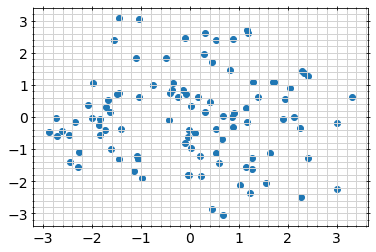

In [19]:
PCAer = sklearn.decomposition.PCA(n_components = 2)
PCAer.fit(vectors)

X = PCAer.transform(vectors)

plt.scatter(X[:,0], X[:,1])
plt.show()